# Comparing methods of hurricane forecast uncertainty
##### author: Elizabeth A. Barnes, Randal J. Barnes and Mark DeMaria
##### version: v0.1.0

```
conda create --name env-hurr-tfp python=3.9
conda activate env-hurr-tfp
pip install tensorflow==2.7.0
pip install tensorflow-probability==0.15.0
pip install --upgrade numpy scipy pandas statsmodels matplotlib seaborn 
pip install --upgrade palettable progressbar2 tabulate icecream flake8
pip install --upgrade keras-tuner sklearn
pip install --upgrade jupyterlab black isort jupyterlab_code_formatter
pip install silence-tensorflow
pip install tqdm
```

Use the command
```python -m pip freeze > requirements.txt```
to make a pip installation list.

In [1]:
import datetime
import os
import pickle
import pprint
import time

import experiment_settings
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from build_data import build_hurricane_data
import build_model
from model_diagnostics import plot_history
from save_model_run import save_model_run
from sklearn import preprocessing
from training_instrumentation import TrainingInstrumentation
from silence_tensorflow import silence_tensorflow
import tensorflow_probability as tfp

silence_tensorflow()

In [2]:
__author__ = "Randal J Barnes and Elizabeth A. Barnes"
__version__ = "21 January 2022"

EXP_NAME_LIST = (
                 "intensity0_EPCP72",
                 "intensity1_EPCP72",
                 "intensity2_EPCP72",
                 "intensity3_EPCP72",    
                )


OVERWRITE_MODEL = False
DATA_PATH = "data/"
MODEL_PATH = "saved_models/"

In [3]:
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["figure.dpi"] = 150
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

## Start looping through random seeds

years(2018,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_intensity_and_track_extended.dat',
 'onehot_test_shape': (313, 1),
 'onehot_train_shape': (1081, 1),
 'onehot_val_shape': (256, 1),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (313, 11),
 'x_train_shape': (1081, 11),
 'x_val_shape': (256, 11),
 'y_name': ['OBDV']}


         |   cnt |   min |   25% |   50% |   75% |   max |   avg |   std |   iqr
---------+-------+-------+-------+-------+-------+-------+-------+-------+-------
 y_train |  1081 | -49.2 | -12.0 |  -1.8 |  12.0 | 103.0 |  0.89 | 19.55 |  24.0
 y_val   |   256 | -44.0 | -11.0 |  -0.7 |  11.2 |  56.0 |  1.29 | 18.39 |  22.2
 y_test  |   313 | -40.0 |  -9.5 |   2.3 |  19.2 |  53.8 |  5.25 | 19.26 |  28.7


'intensity0_EPCP72_reg_network_seed_605_rng_seed_605

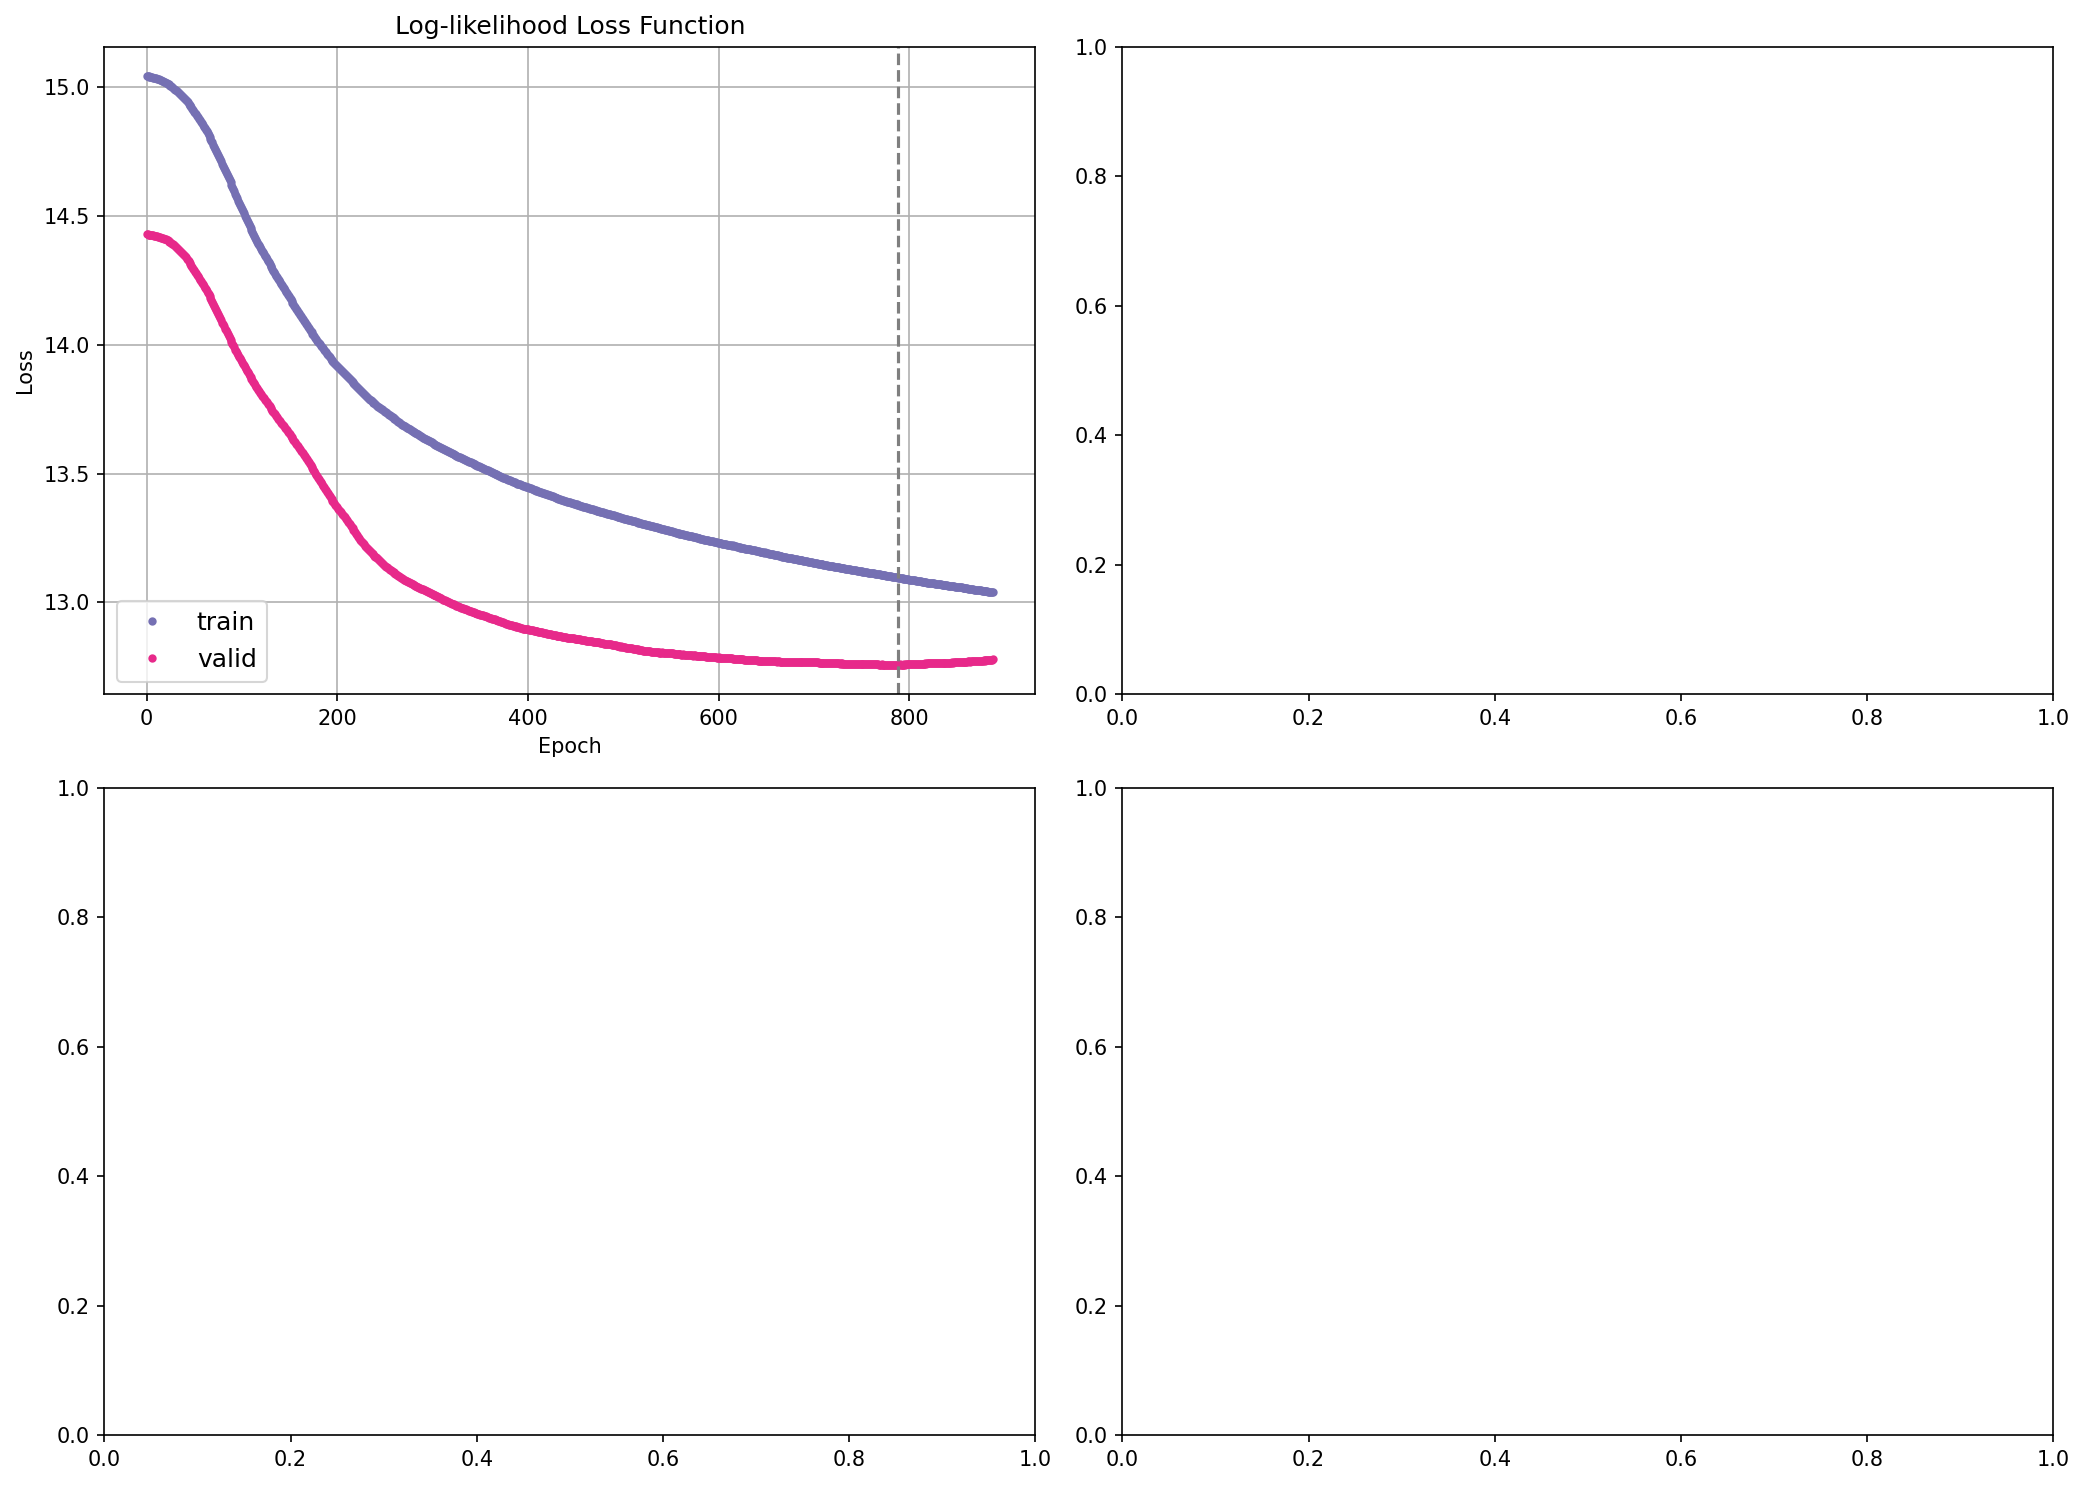

years(2018,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_intensity_and_track_extended.dat',
 'onehot_test_shape': (313, 1),
 'onehot_train_shape': (1081, 1),
 'onehot_val_shape': (256, 1),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (313, 11),
 'x_train_shape': (1081, 11),
 'x_val_shape': (256, 11),
 'y_name': ['OBDV']}


         |   cnt |   min |   25% |   50% |   75% |   max |   avg |   std |   iqr
---------+-------+-------+-------+-------+-------+-------+-------+-------+-------
 y_train |  1081 | -49.2 | -11.8 |  -1.8 |  11.8 | 103.0 |  0.83 | 19.13 |  23.6
 y_val   |   256 | -45.0 | -11.8 |   0.2 |  13.1 |  71.5 |  1.53 | 20.16 |  24.9
 y_test  |   313 | -40.0 |  -9.5 |   2.3 |  19.2 |  53.8 |  5.25 | 19.26 |  28.7


'intensity0_EPCP72_reg_network_seed_122_rng_seed_122

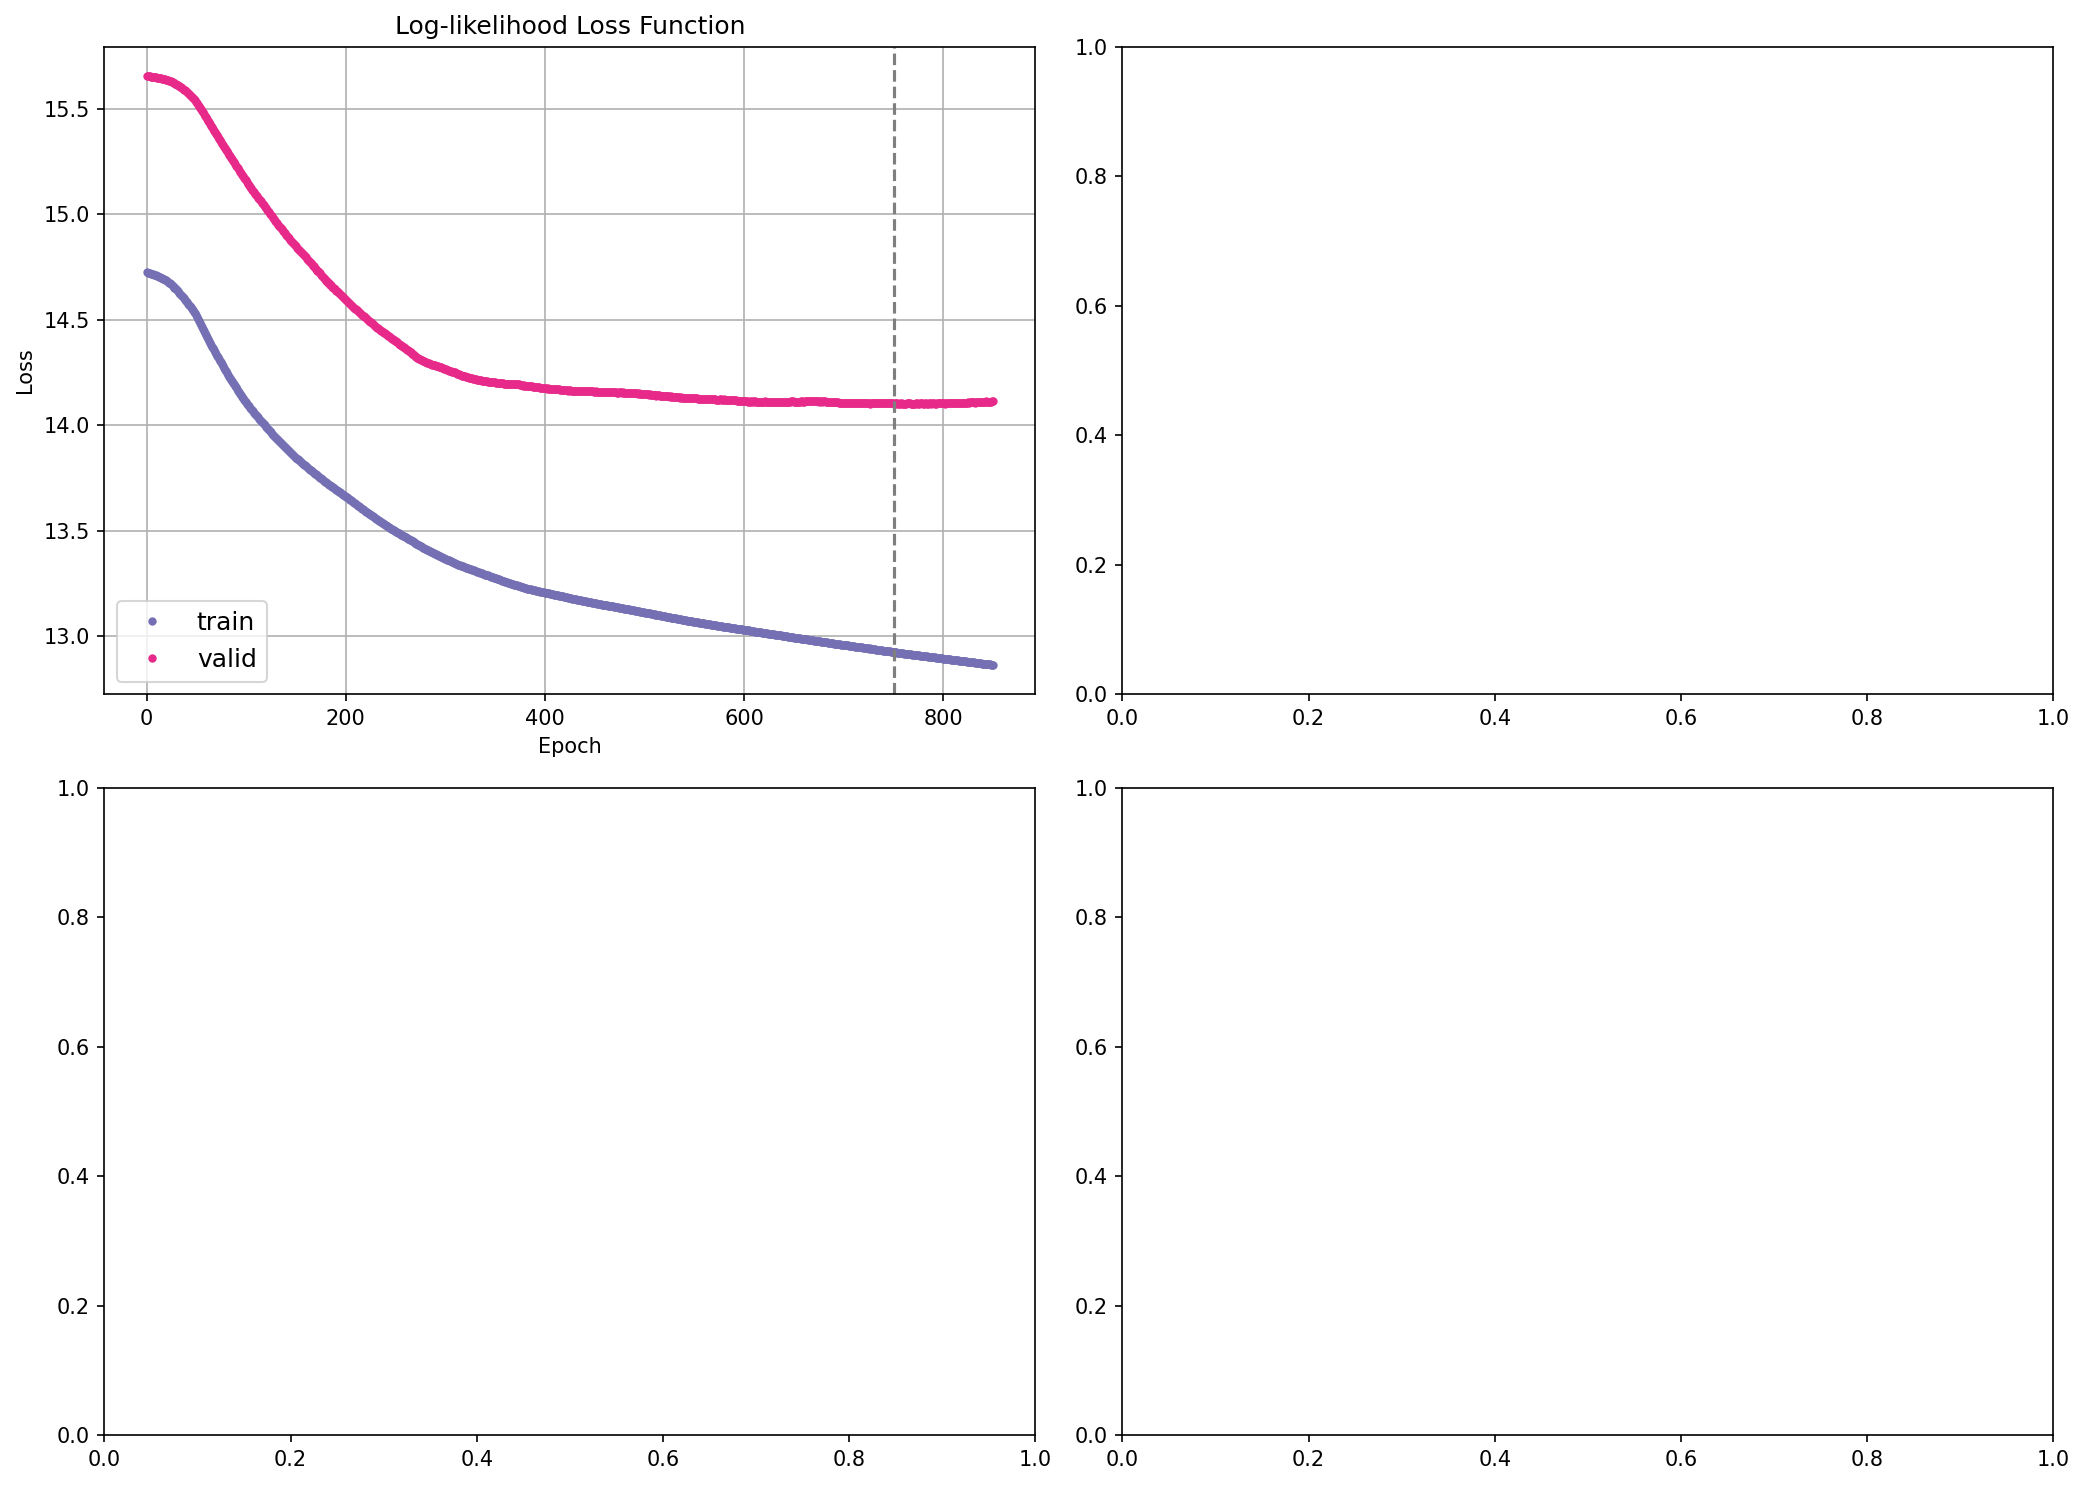

years(2018,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_intensity_and_track_extended.dat',
 'onehot_test_shape': (313, 1),
 'onehot_train_shape': (1081, 1),
 'onehot_val_shape': (256, 1),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (313, 11),
 'x_train_shape': (1081, 11),
 'x_val_shape': (256, 11),
 'y_name': ['OBDV']}


         |   cnt |   min |   25% |   50% |   75% |   max |   avg |   std |   iqr
---------+-------+-------+-------+-------+-------+-------+-------+-------+-------
 y_train |  1081 | -47.0 | -12.0 |  -1.5 |  12.0 | 103.0 |  0.84 | 19.39 |  24.0
 y_val   |   256 | -49.2 | -10.9 |  -1.2 |  12.5 |  71.5 |  1.50 | 19.09 |  23.4
 y_test  |   313 | -40.0 |  -9.5 |   2.3 |  19.2 |  53.8 |  5.25 | 19.26 |  28.7


'intensity0_EPCP72_reg_network_seed_786_rng_seed_786

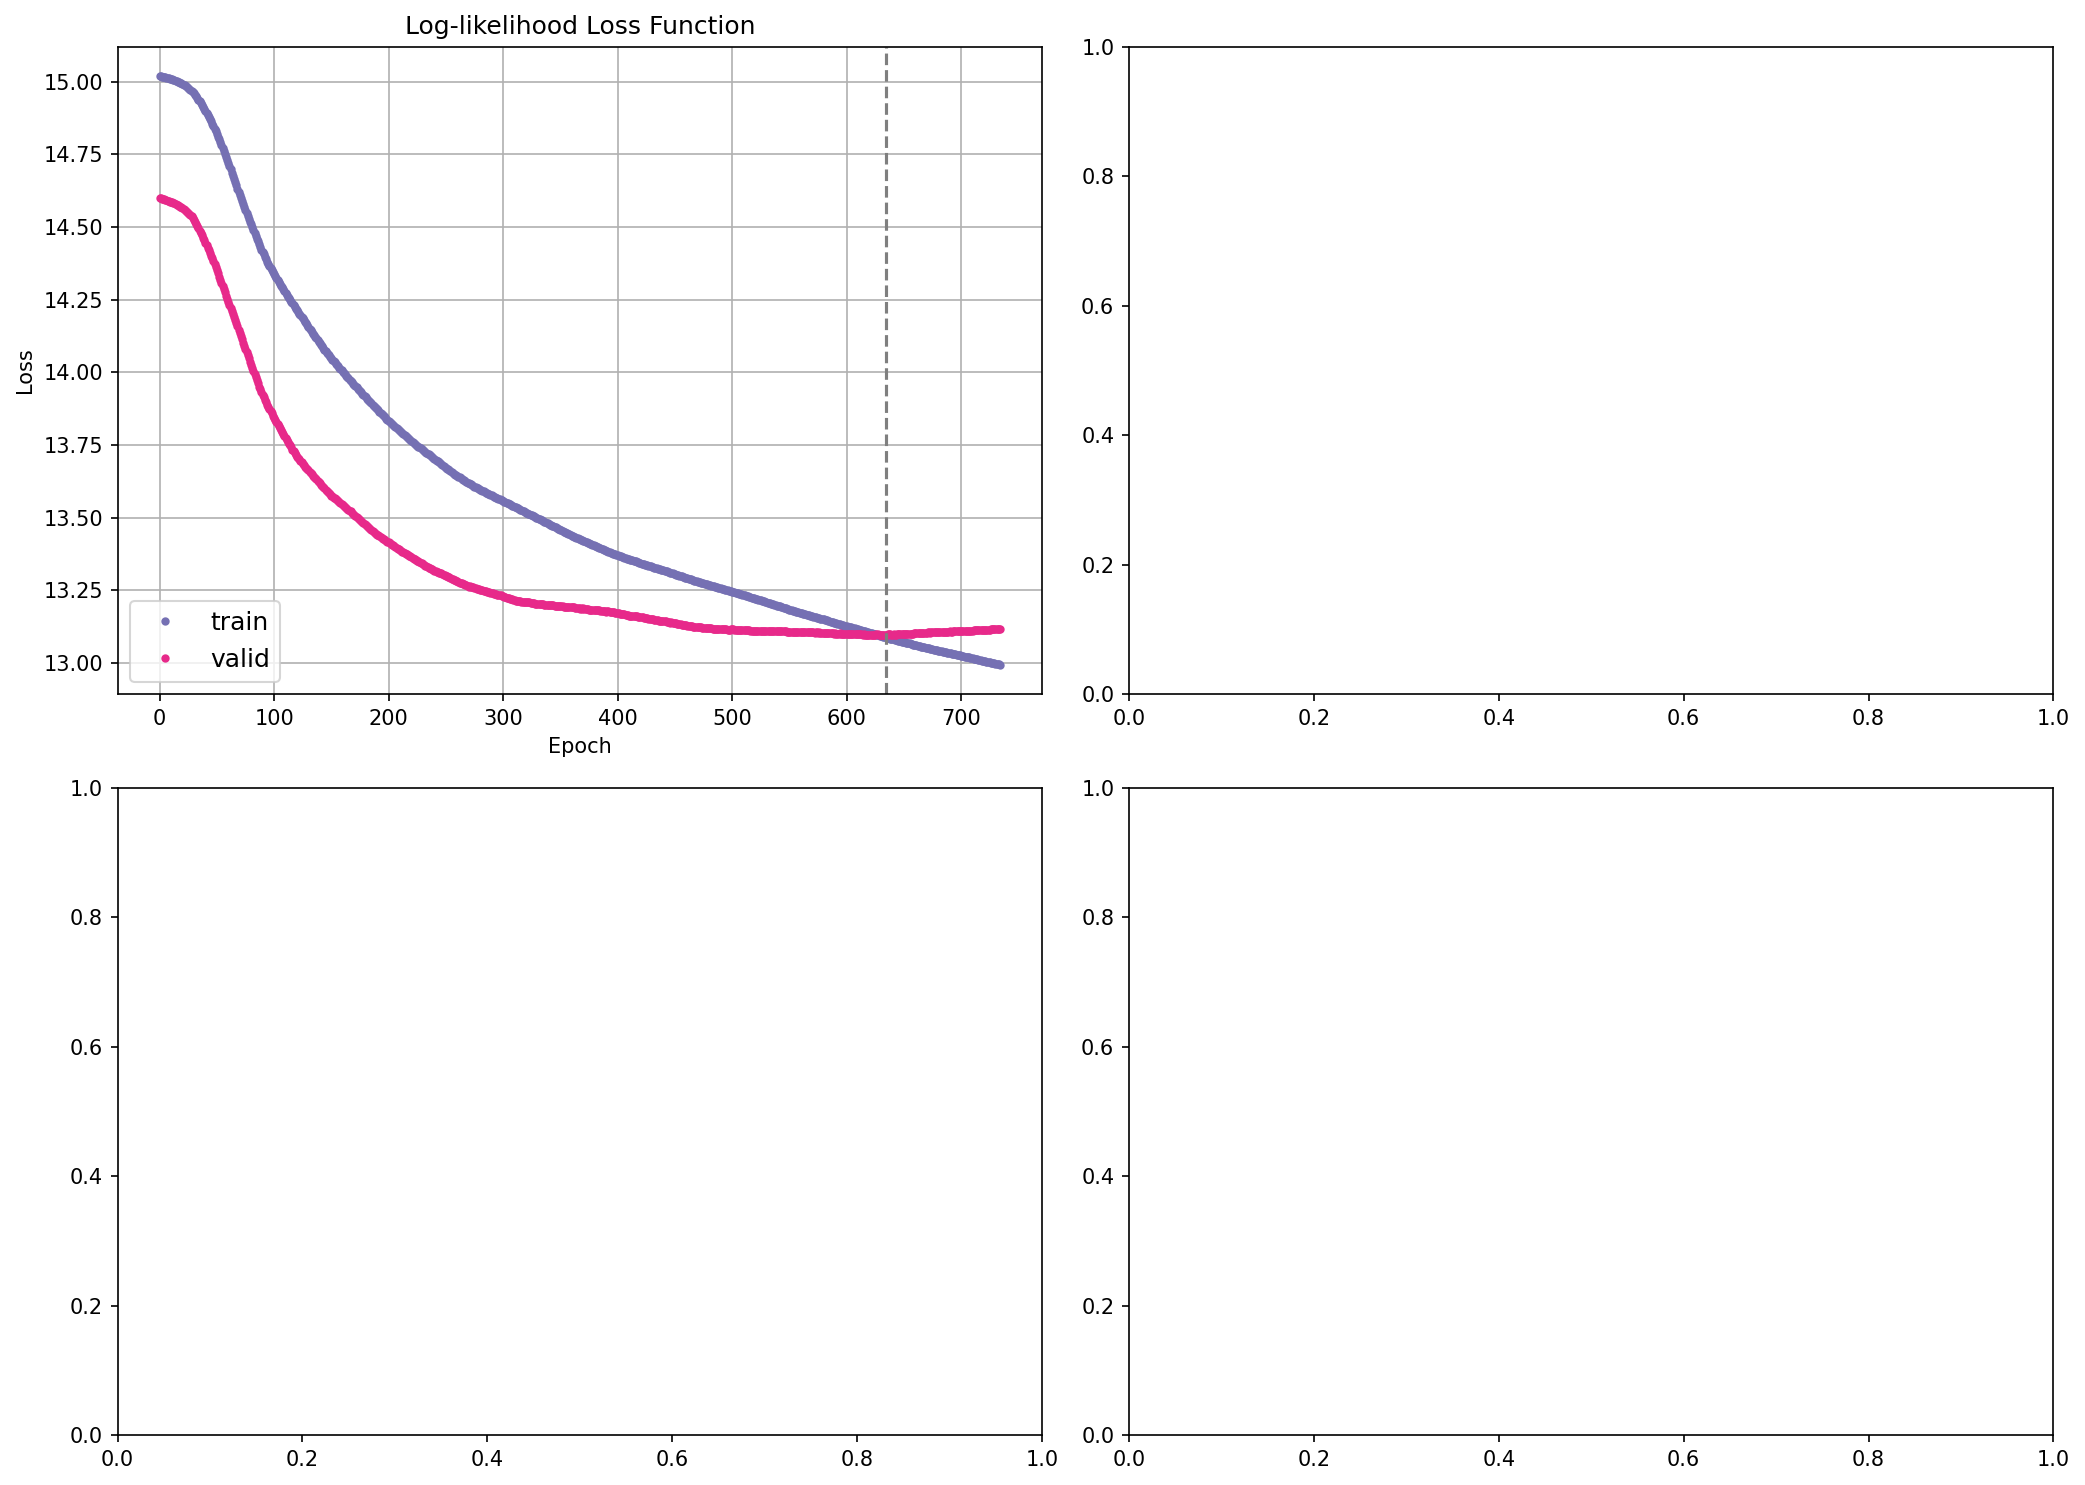

years(2018,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_intensity_and_track_extended.dat',
 'onehot_test_shape': (313, 1),
 'onehot_train_shape': (1081, 1),
 'onehot_val_shape': (256, 1),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (313, 11),
 'x_train_shape': (1081, 11),
 'x_val_shape': (256, 11),
 'y_name': ['OBDV']}


         |   cnt |   min |   25% |   50% |   75% |   max |   avg |   std |   iqr
---------+-------+-------+-------+-------+-------+-------+-------+-------+-------
 y_train |  1081 | -49.2 | -11.8 |  -1.2 |  12.0 | 103.0 |  0.91 | 19.35 |  23.8
 y_val   |   256 | -41.5 | -11.6 |  -2.5 |  12.2 |  73.5 |  1.20 | 19.25 |  23.8
 y_test  |   313 | -40.0 |  -9.5 |   2.3 |  19.2 |  53.8 |  5.25 | 19.26 |  28.7


'intensity0_EPCP72_reg_network_seed_311_rng_seed_311

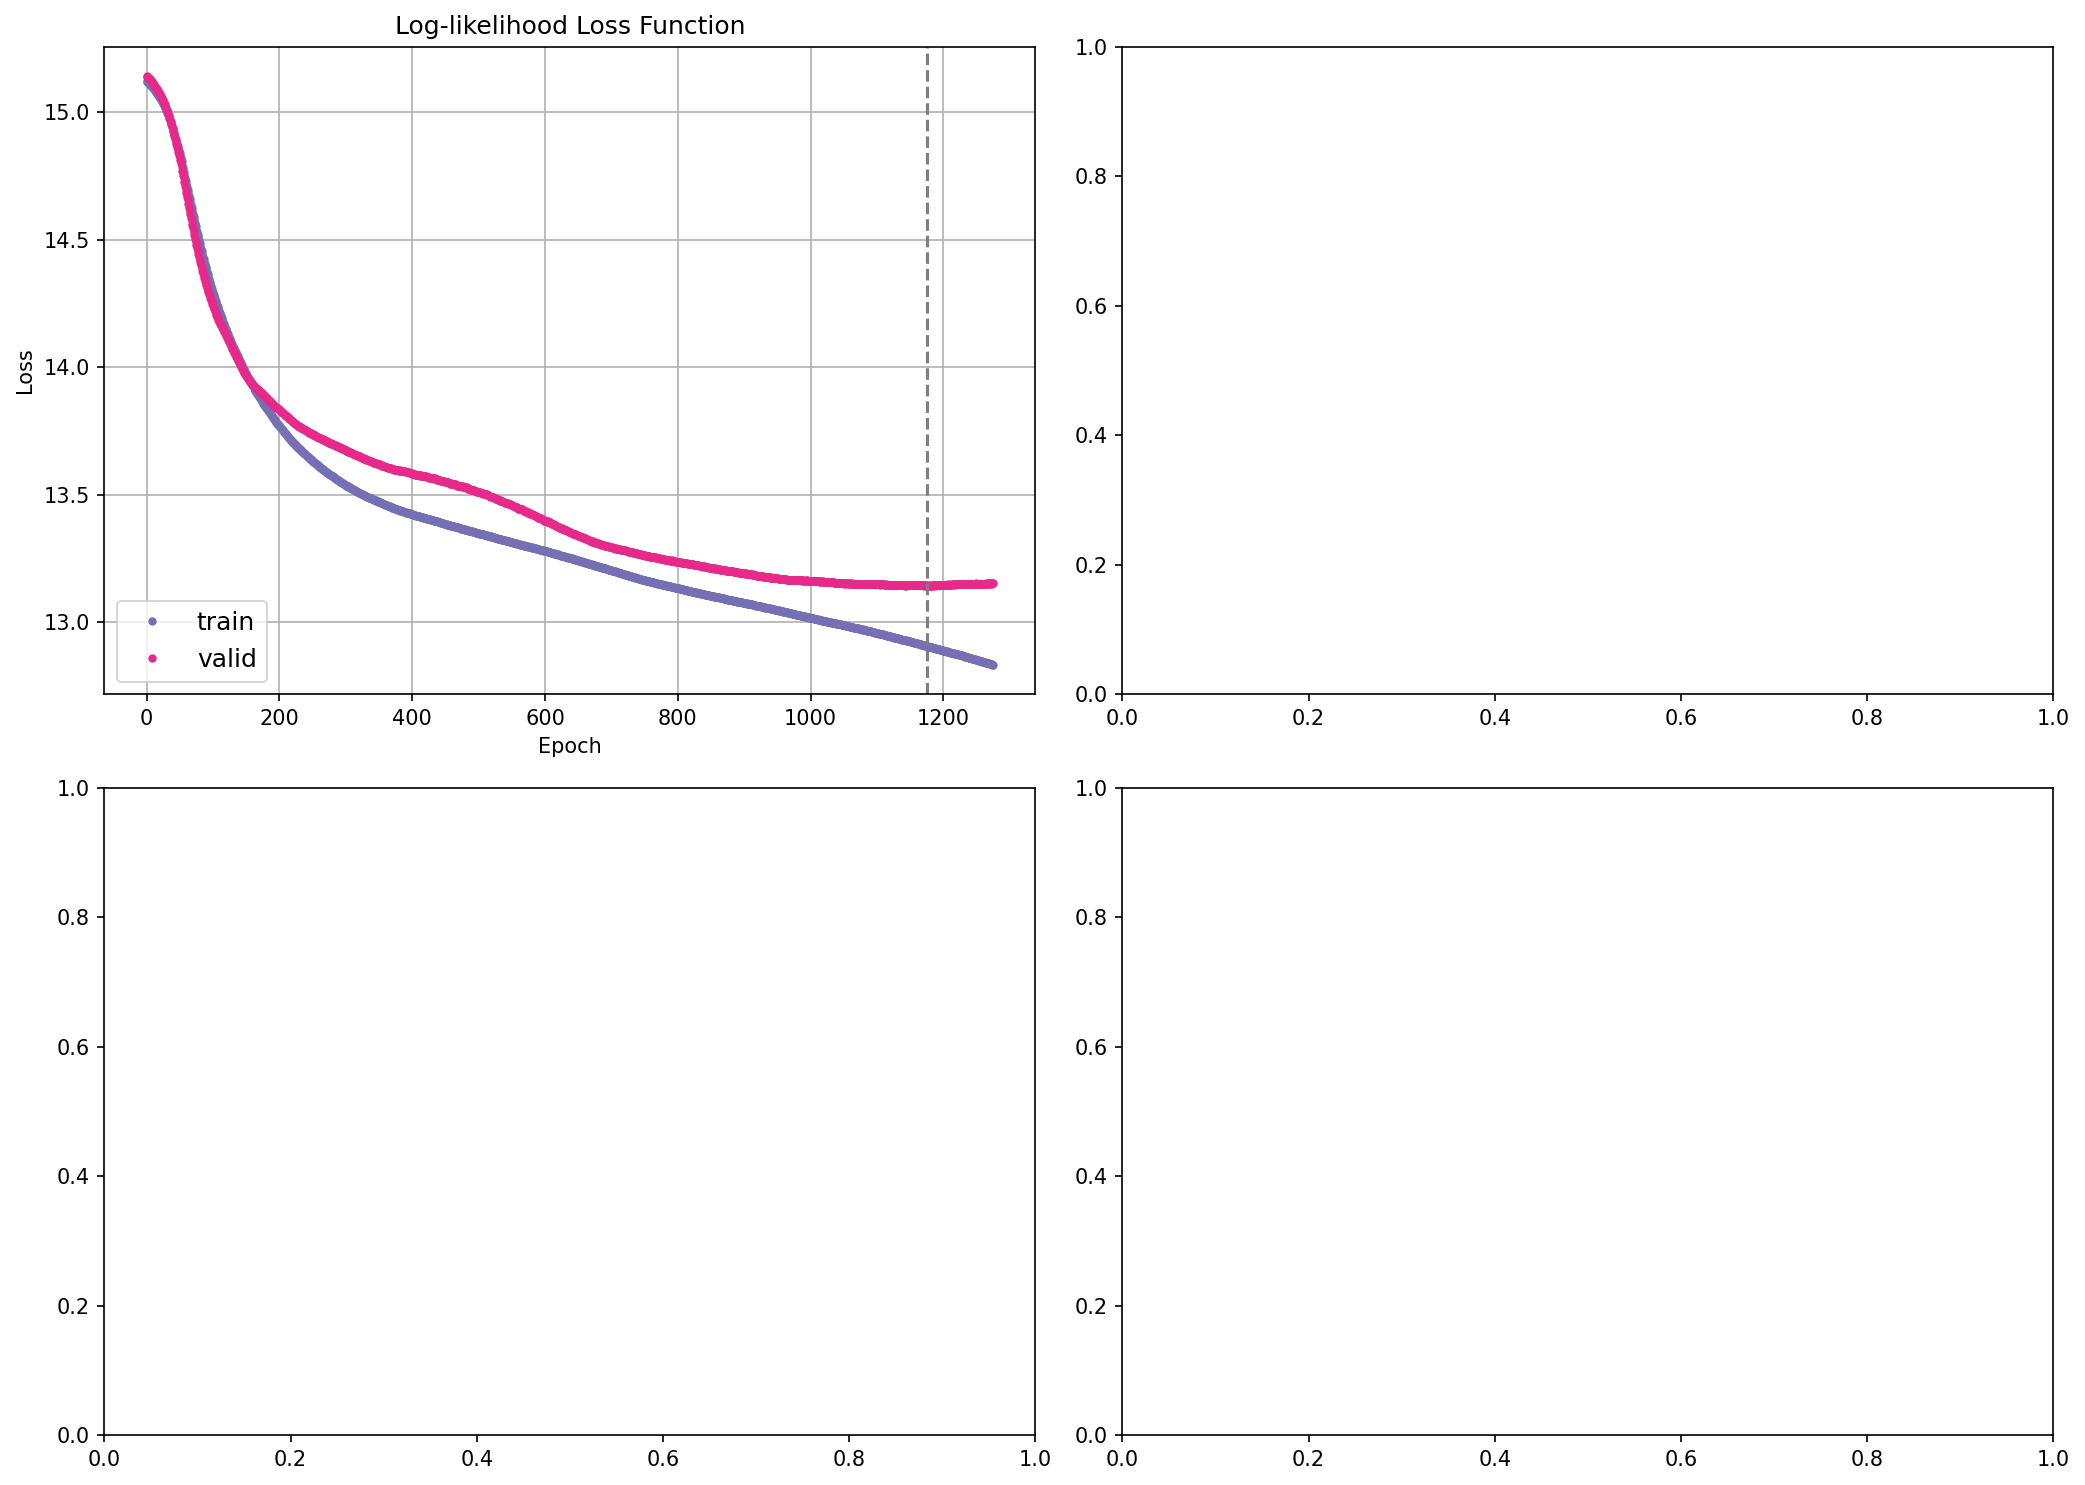

years(2018,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_intensity_and_track_extended.dat',
 'onehot_test_shape': (313, 1),
 'onehot_train_shape': (1081, 1),
 'onehot_val_shape': (256, 1),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (313, 11),
 'x_train_shape': (1081, 11),
 'x_val_shape': (256, 11),
 'y_name': ['OBDV']}


         |   cnt |   min |   25% |   50% |   75% |   max |   avg |   std |   iqr
---------+-------+-------+-------+-------+-------+-------+-------+-------+-------
 y_train |  1081 | -47.0 | -11.8 |  -1.8 |  12.2 | 103.0 |  0.83 | 19.27 |  24.0
 y_val   |   256 | -49.2 | -11.6 |  -0.1 |  11.5 |  74.5 |  1.52 | 19.57 |  23.1
 y_test  |   313 | -40.0 |  -9.5 |   2.3 |  19.2 |  53.8 |  5.25 | 19.26 |  28.7


'intensity0_EPCP72_reg_network_seed_888_rng_seed_888

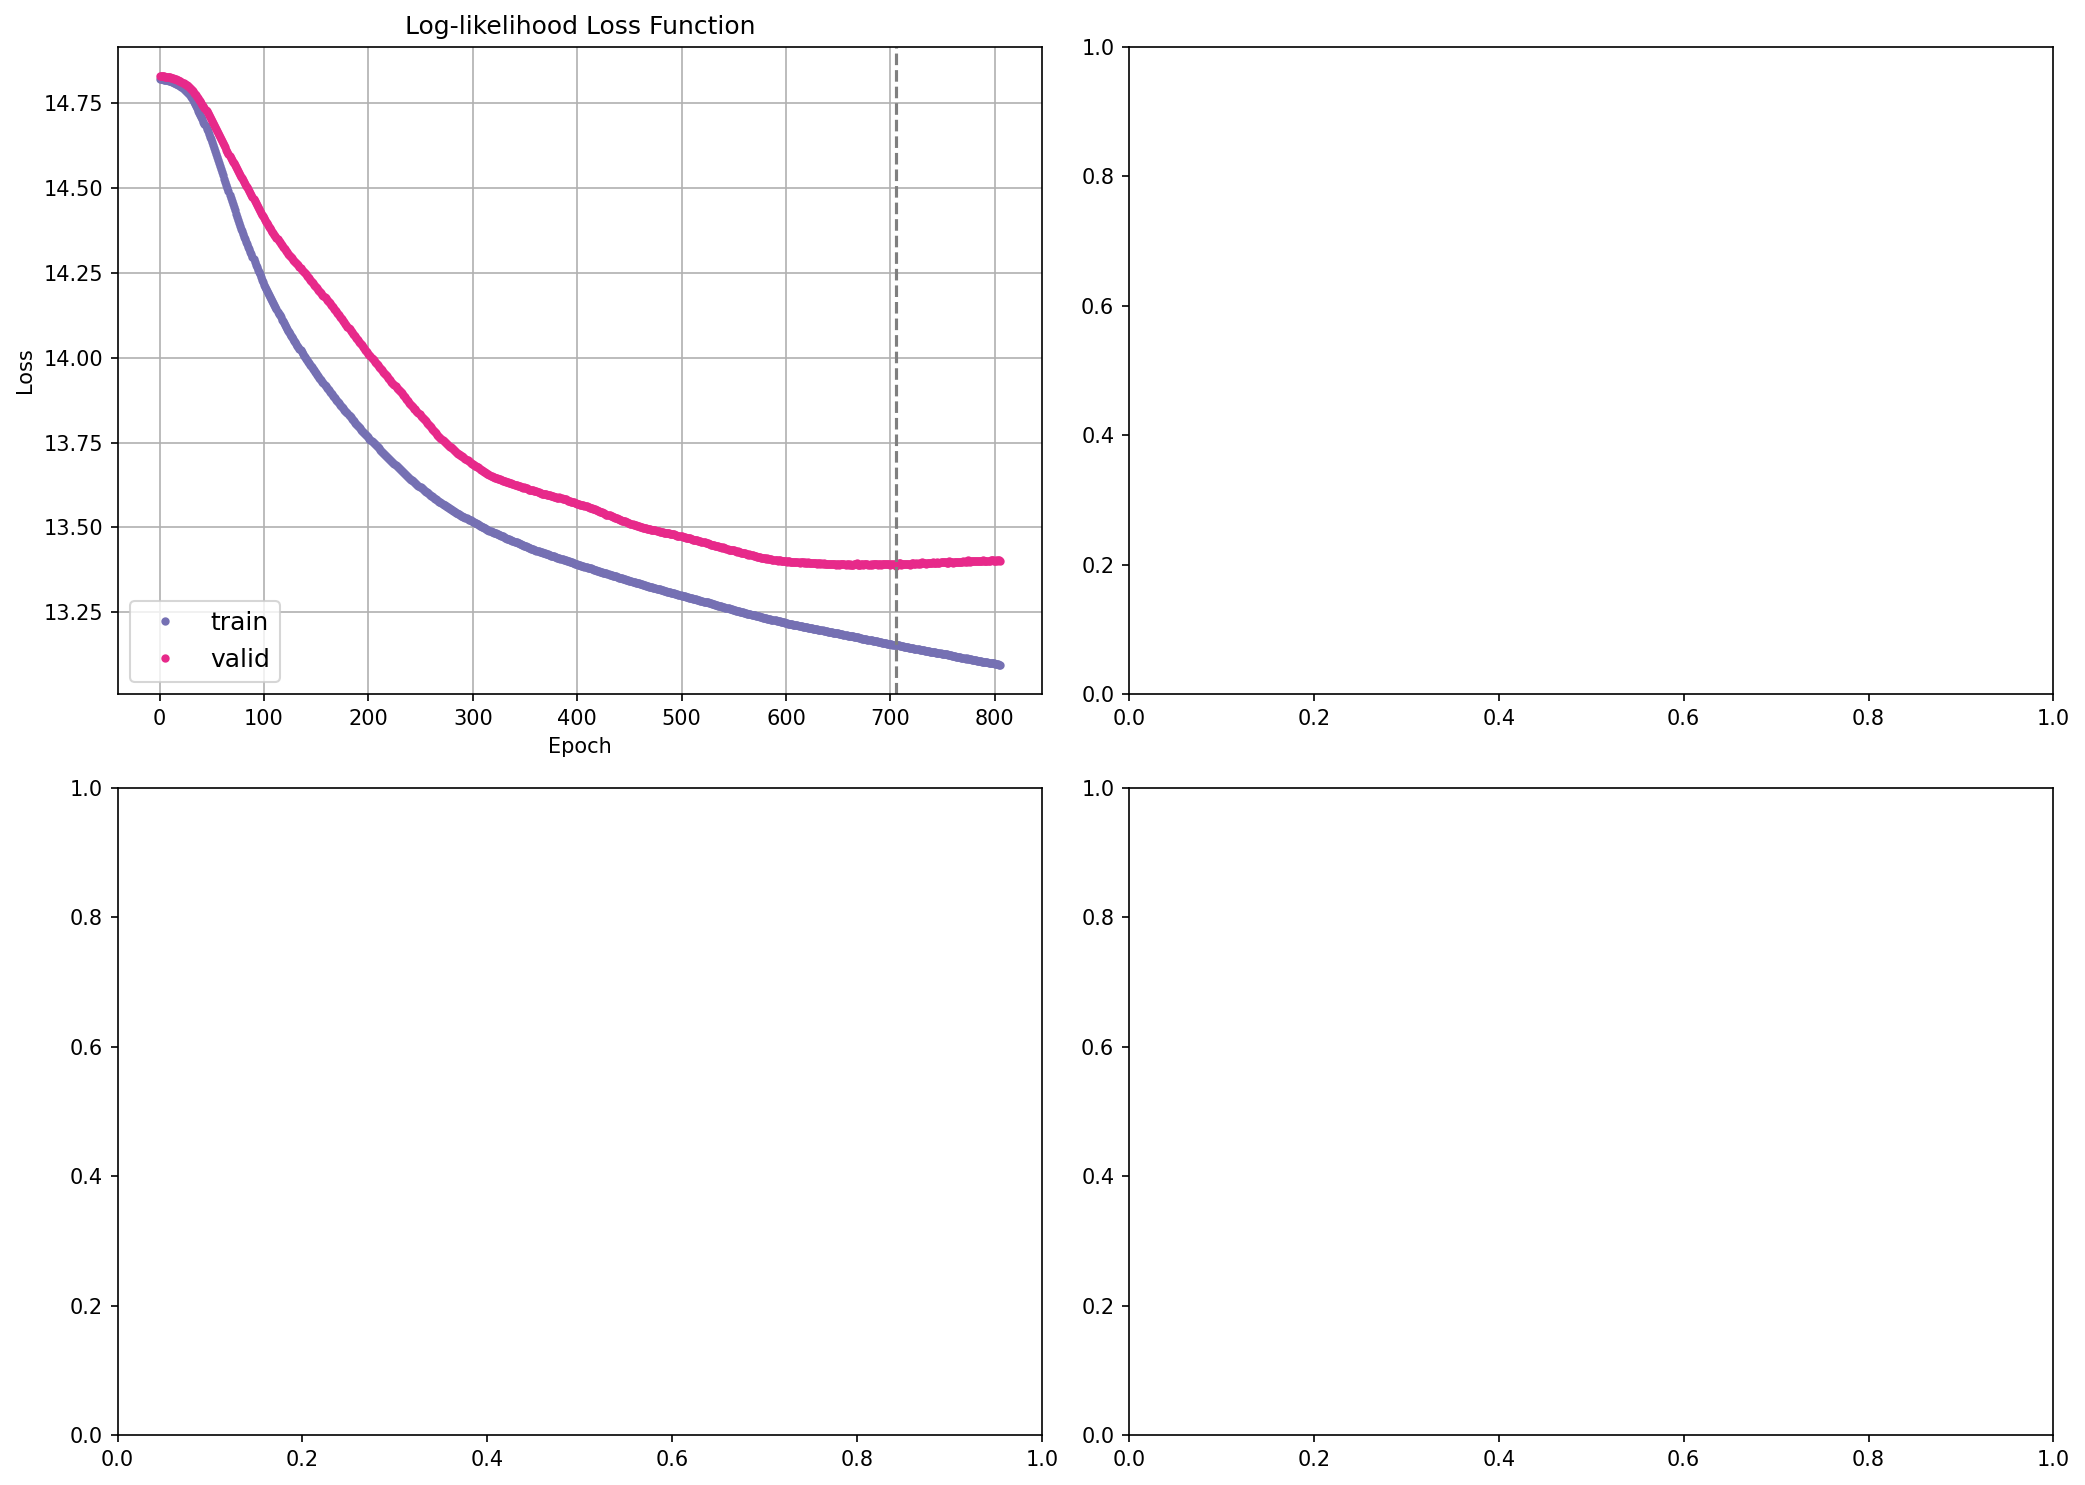

years(2018,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_intensity_and_track_extended.dat',
 'onehot_test_shape': (313, 1),
 'onehot_train_shape': (1081, 1),
 'onehot_val_shape': (256, 1),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (313, 11),
 'x_train_shape': (1081, 11),
 'x_val_shape': (256, 11),
 'y_name': ['OBDV']}


         |   cnt |   min |   25% |   50% |   75% |   max |   avg |   std |   iqr
---------+-------+-------+-------+-------+-------+-------+-------+-------+-------
 y_train |  1081 | -49.2 | -12.0 |  -1.8 |  11.8 |  74.8 |  0.74 | 18.87 |  23.8
 y_val   |   256 | -44.0 | -11.2 |  -0.5 |  13.9 | 103.0 |  1.91 | 21.14 |  25.1
 y_test  |   313 | -40.0 |  -9.5 |   2.3 |  19.2 |  53.8 |  5.25 | 19.26 |  28.7


'intensity0_EPCP72_reg_network_seed_999_rng_seed_999

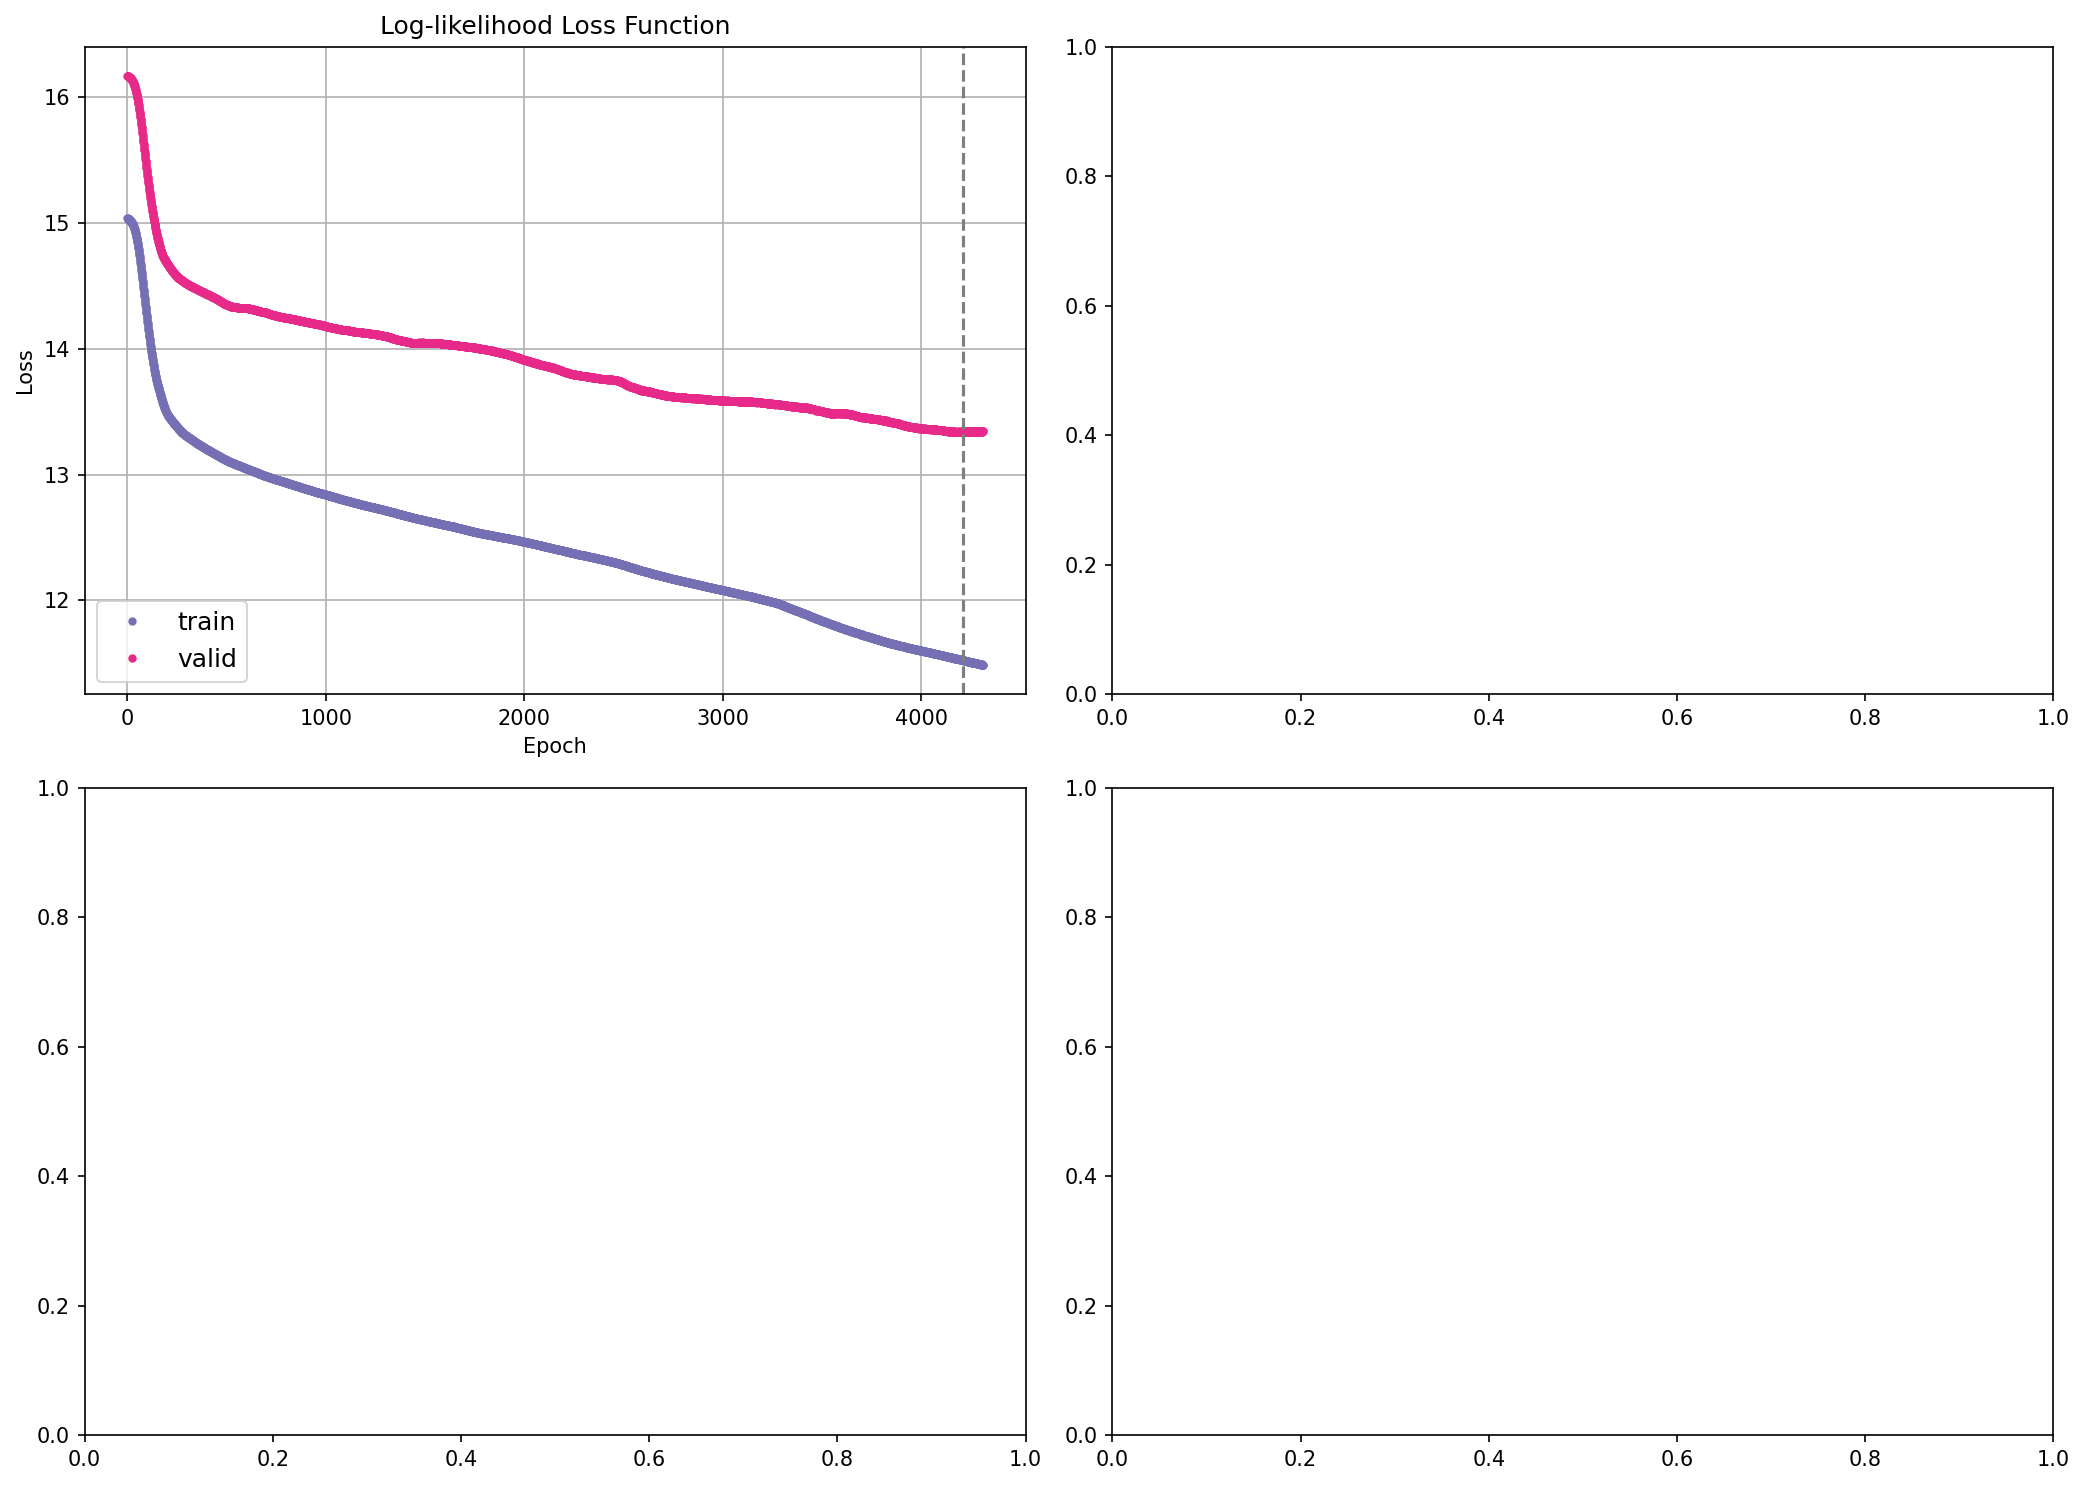

years(2018,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_intensity_and_track_extended.dat',
 'onehot_test_shape': (313, 1),
 'onehot_train_shape': (1081, 1),
 'onehot_val_shape': (256, 1),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (313, 11),
 'x_train_shape': (1081, 11),
 'x_val_shape': (256, 11),
 'y_name': ['OBDV']}


         |   cnt |   min |   25% |   50% |   75% |   max |   avg |   std |   iqr
---------+-------+-------+-------+-------+-------+-------+-------+-------+-------
 y_train |  1081 | -47.0 | -11.8 |  -1.2 |  12.2 | 103.0 |  1.23 | 19.44 |  24.0
 y_val   |   256 | -49.2 | -12.2 |  -2.0 |   9.6 |  64.2 | -0.18 | 18.82 |  21.8
 y_test  |   313 | -40.0 |  -9.5 |   2.3 |  19.2 |  53.8 |  5.25 | 19.26 |  28.7


'intensity0_EPCP72_reg_network_seed_578_rng_seed_578

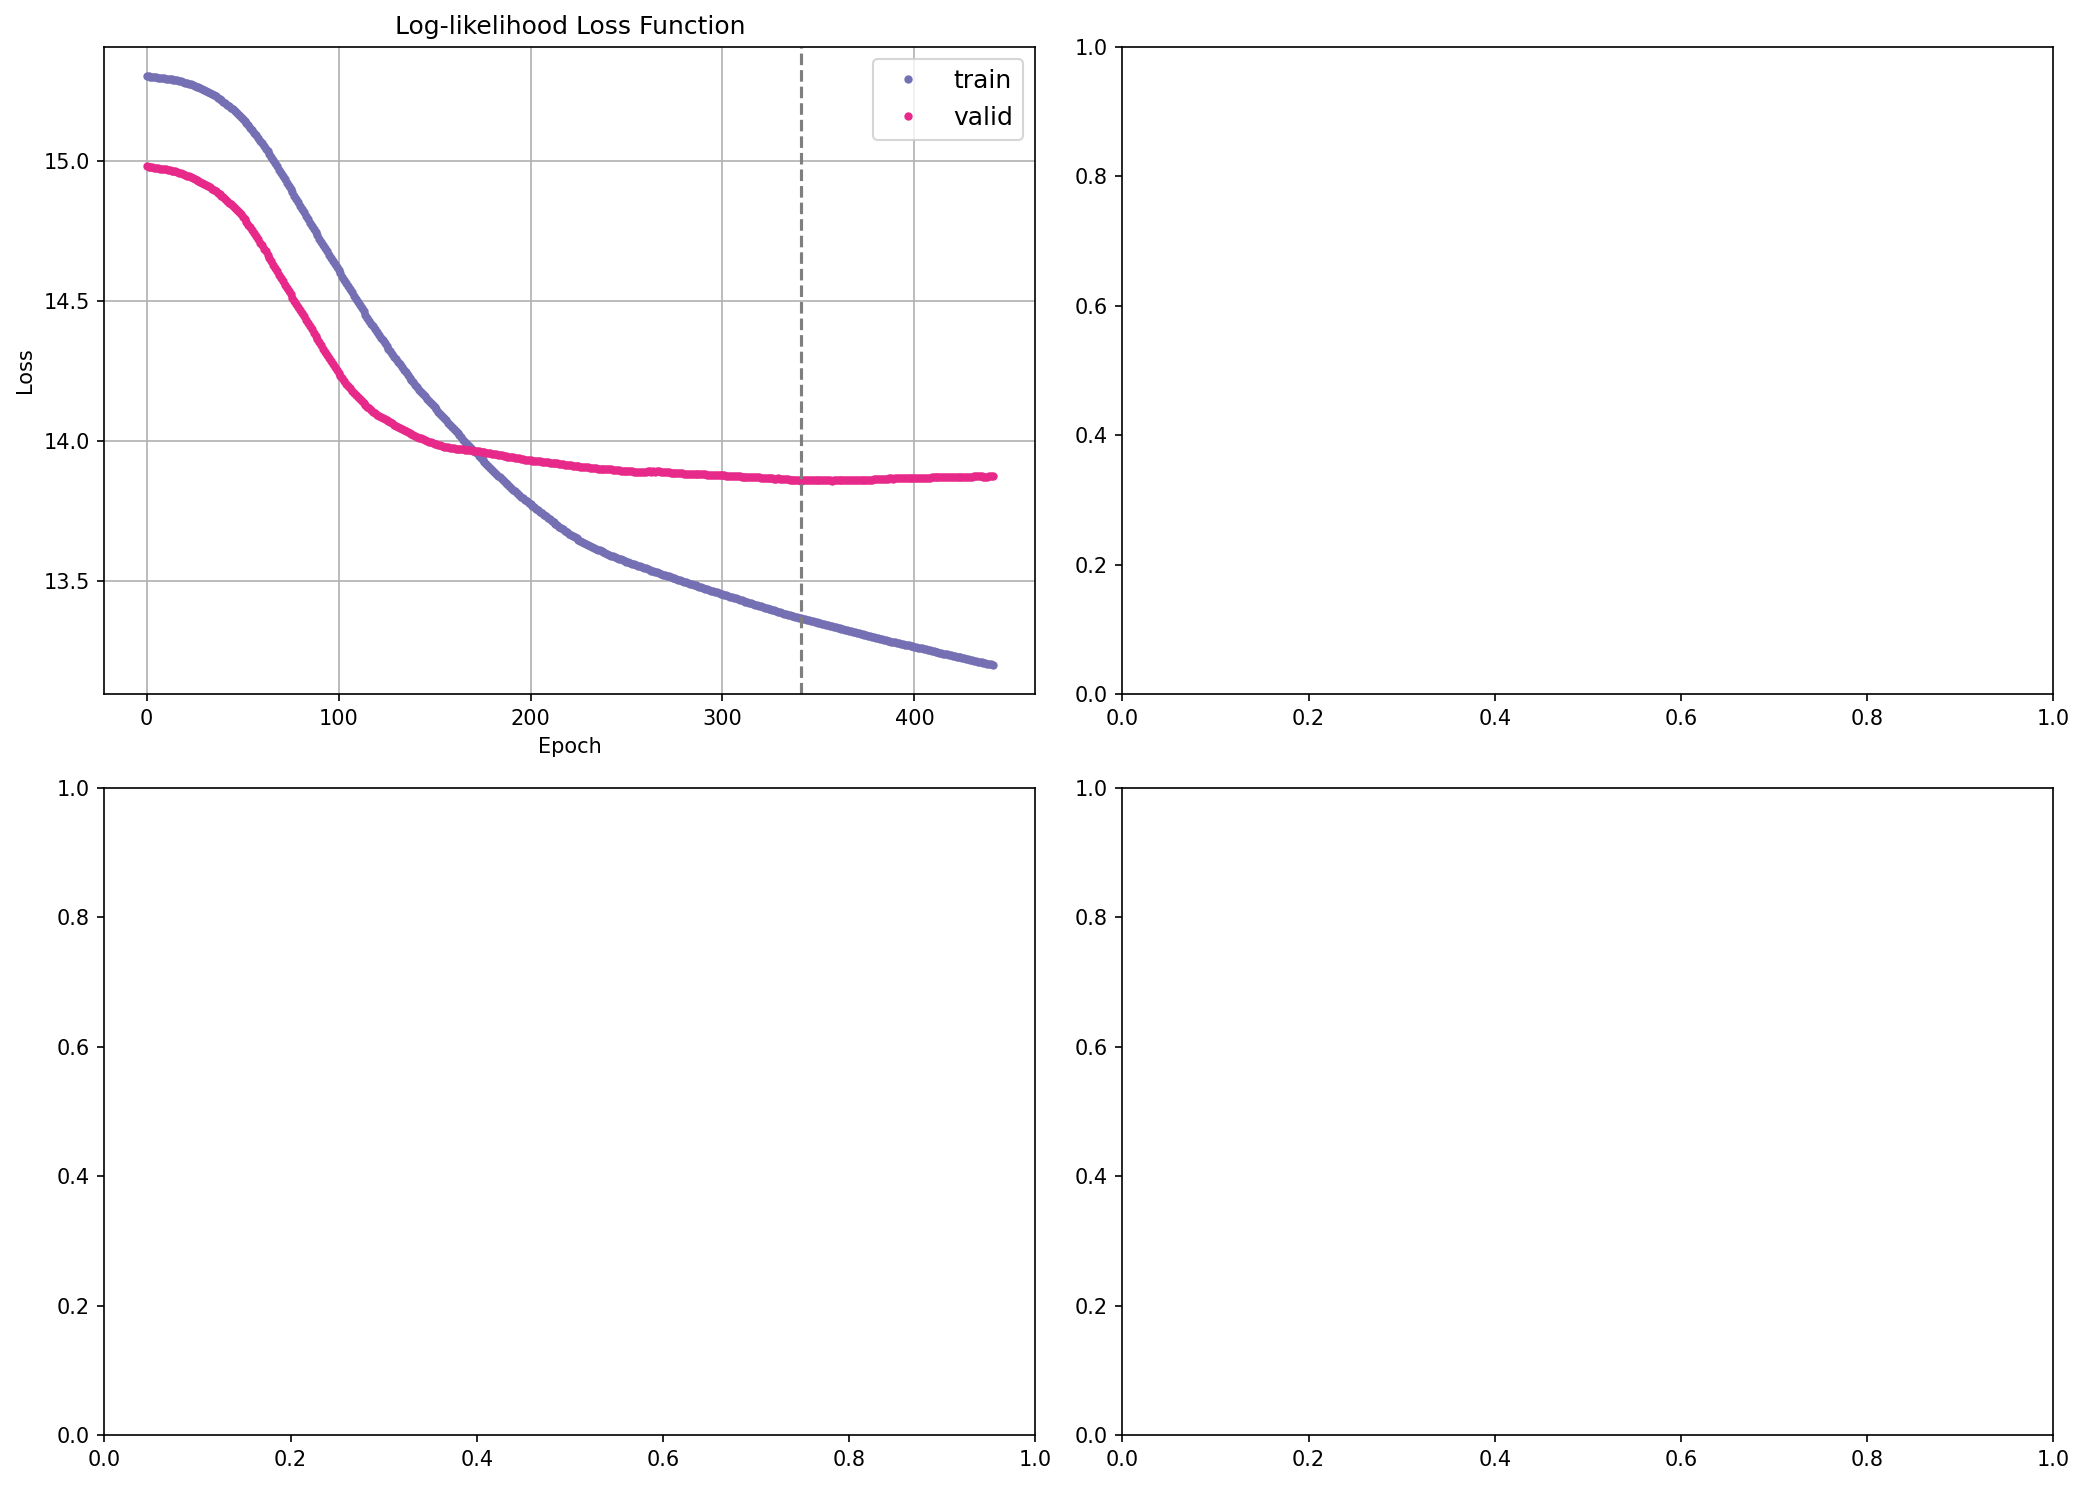

years(2018,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_intensity_and_track_extended.dat',
 'onehot_test_shape': (313, 1),
 'onehot_train_shape': (1081, 1),
 'onehot_val_shape': (256, 1),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (313, 11),
 'x_train_shape': (1081, 11),
 'x_val_shape': (256, 11),
 'y_name': ['OBDV']}


         |   cnt |   min |   25% |   50% |   75% |   max |   avg |   std |   iqr
---------+-------+-------+-------+-------+-------+-------+-------+-------+-------
 y_train |  1081 | -49.2 | -12.0 |  -1.8 |  11.5 | 103.0 |  0.67 | 18.91 |  23.5
 y_val   |   256 | -44.0 | -11.5 |  -0.2 |  14.6 |  74.8 |  2.21 | 20.98 |  26.1
 y_test  |   313 | -40.0 |  -9.5 |   2.3 |  19.2 |  53.8 |  5.25 | 19.26 |  28.7


'intensity0_EPCP72_reg_network_seed_331_rng_seed_331

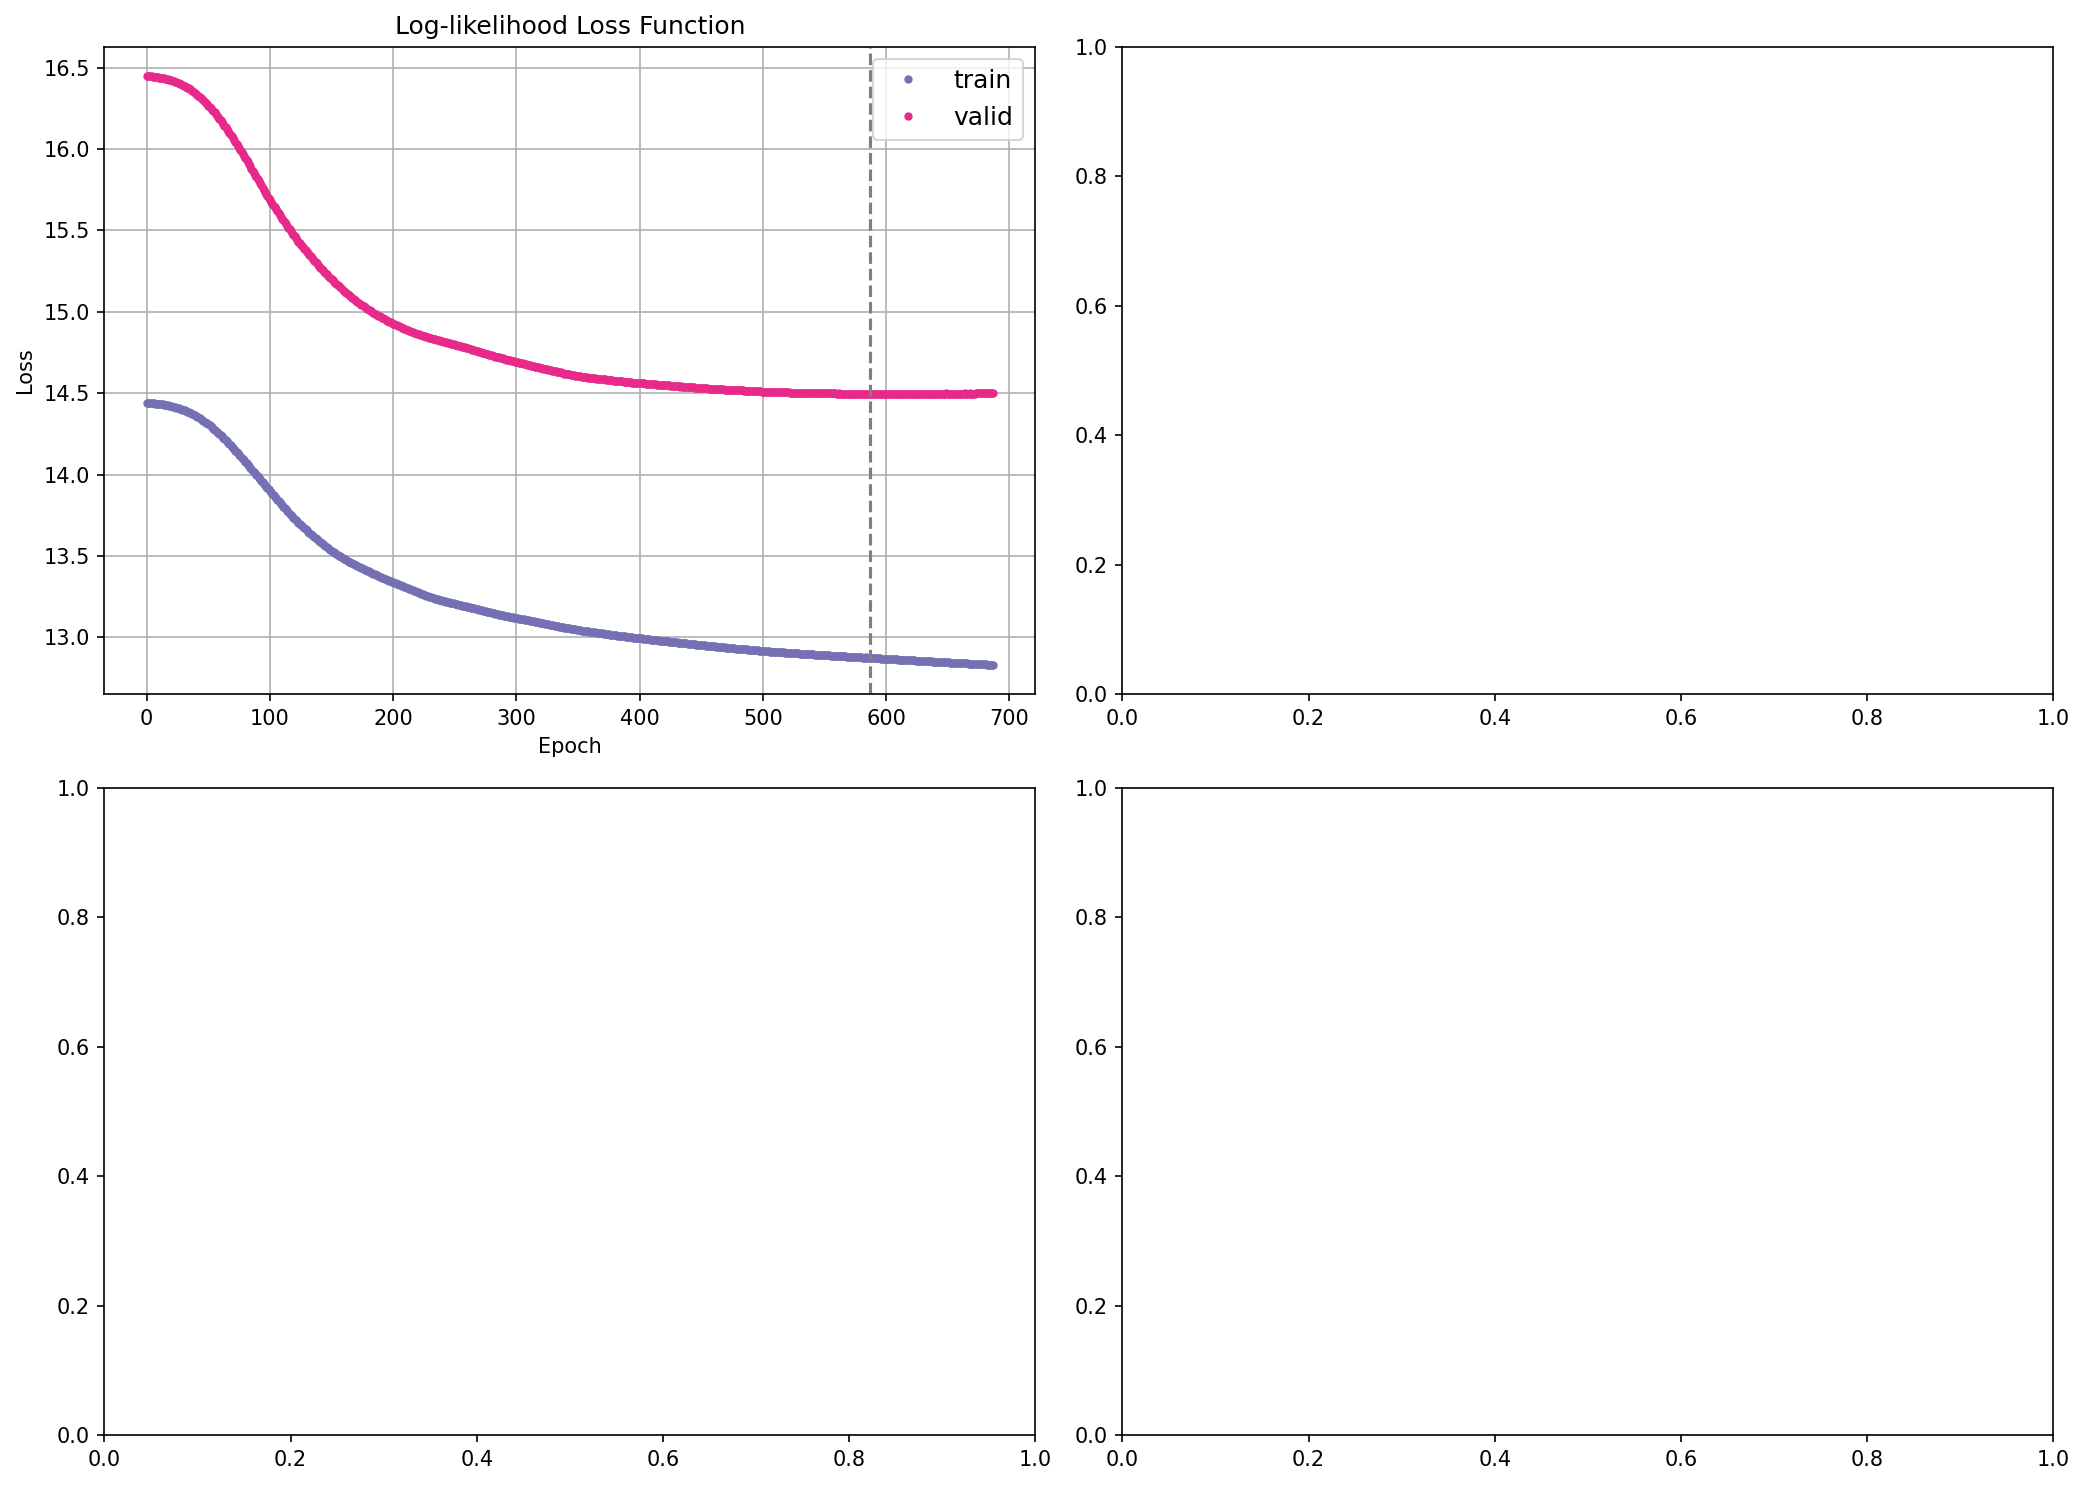

years(2018,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_intensity_and_track_extended.dat',
 'onehot_test_shape': (313, 1),
 'onehot_train_shape': (1081, 1),
 'onehot_val_shape': (256, 1),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (313, 11),
 'x_train_shape': (1081, 11),
 'x_val_shape': (256, 11),
 'y_name': ['OBDV']}


         |   cnt |   min |   25% |   50% |   75% |   max |   avg |   std |   iqr
---------+-------+-------+-------+-------+-------+-------+-------+-------+-------
 y_train |  1081 | -49.2 | -11.5 |  -1.5 |  12.0 | 103.0 |  1.13 | 19.43 |  23.5
 y_val   |   256 | -38.5 | -14.0 |  -1.5 |  12.1 |  74.8 |  0.28 | 18.89 |  26.1
 y_test  |   313 | -40.0 |  -9.5 |   2.3 |  19.2 |  53.8 |  5.25 | 19.26 |  28.7


'intensity0_EPCP72_reg_network_seed_908_rng_seed_908

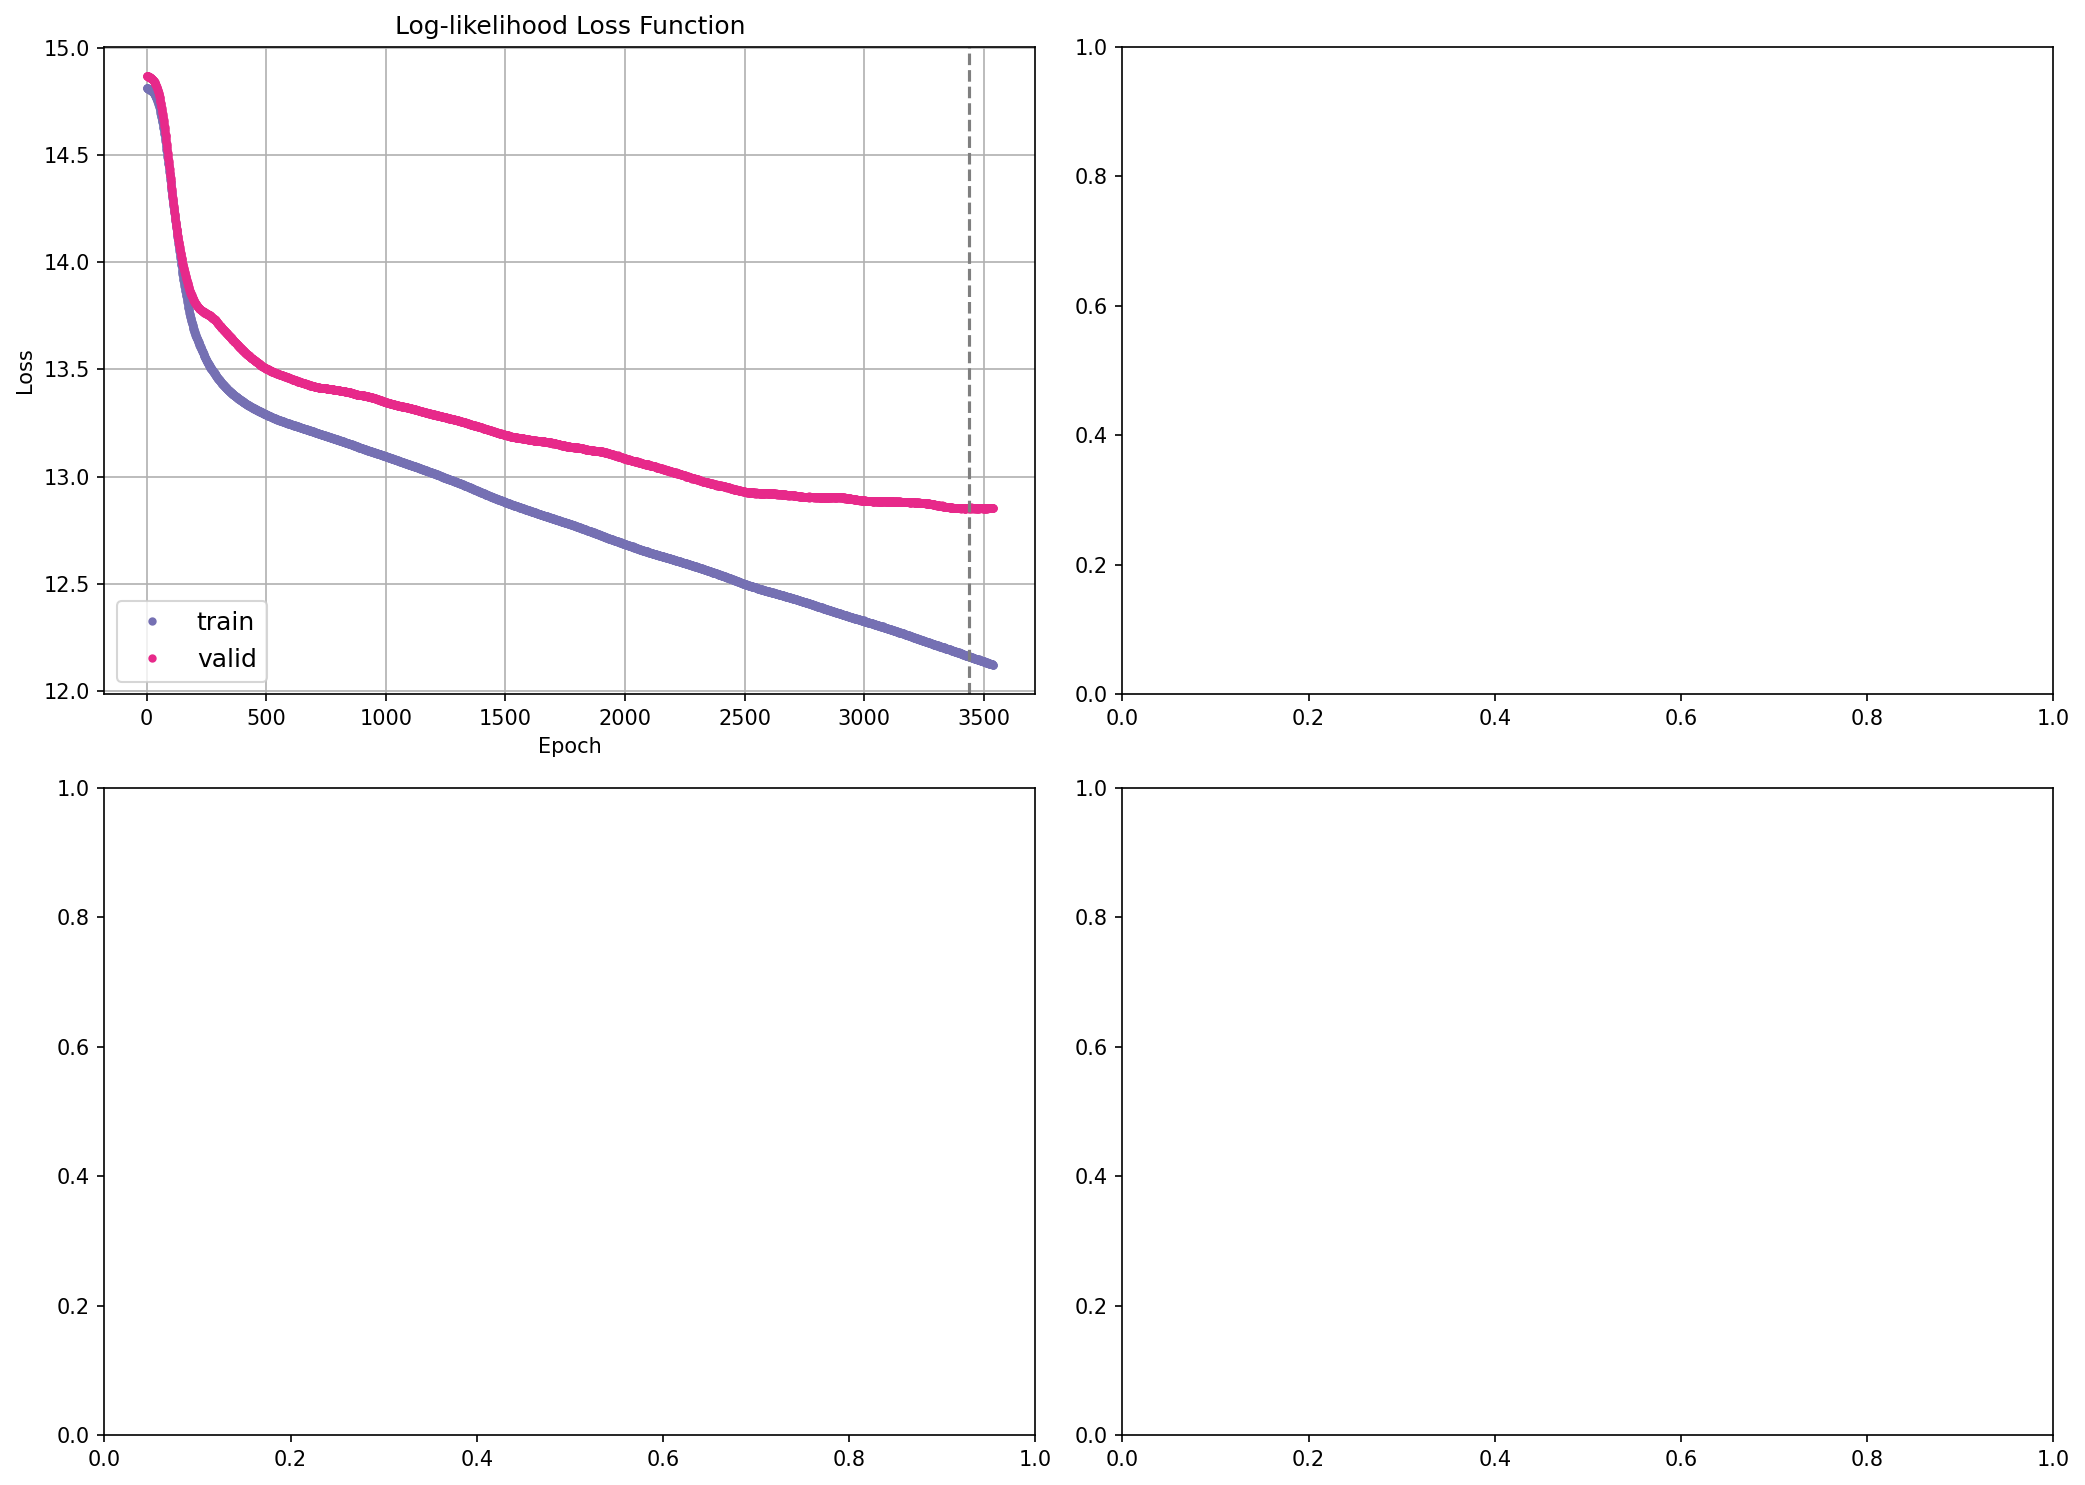

years(2018,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_intensity_and_track_extended.dat',
 'onehot_test_shape': (313, 1),
 'onehot_train_shape': (1081, 1),
 'onehot_val_shape': (256, 1),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (313, 11),
 'x_train_shape': (1081, 11),
 'x_val_shape': (256, 11),
 'y_name': ['OBDV']}


         |   cnt |   min |   25% |   50% |   75% |   max |   avg |   std |   iqr
---------+-------+-------+-------+-------+-------+-------+-------+-------+-------
 y_train |  1081 | -49.2 | -11.8 |  -1.2 |  12.0 | 103.0 |  0.95 | 19.03 |  23.8
 y_val   |   256 | -41.5 | -11.8 |  -2.2 |  12.0 |  74.5 |  1.03 | 20.56 |  23.8
 y_test  |   313 | -40.0 |  -9.5 |   2.3 |  19.2 |  53.8 |  5.25 | 19.26 |  28.7


'intensity0_EPCP72_reg_network_seed_444_rng_seed_444

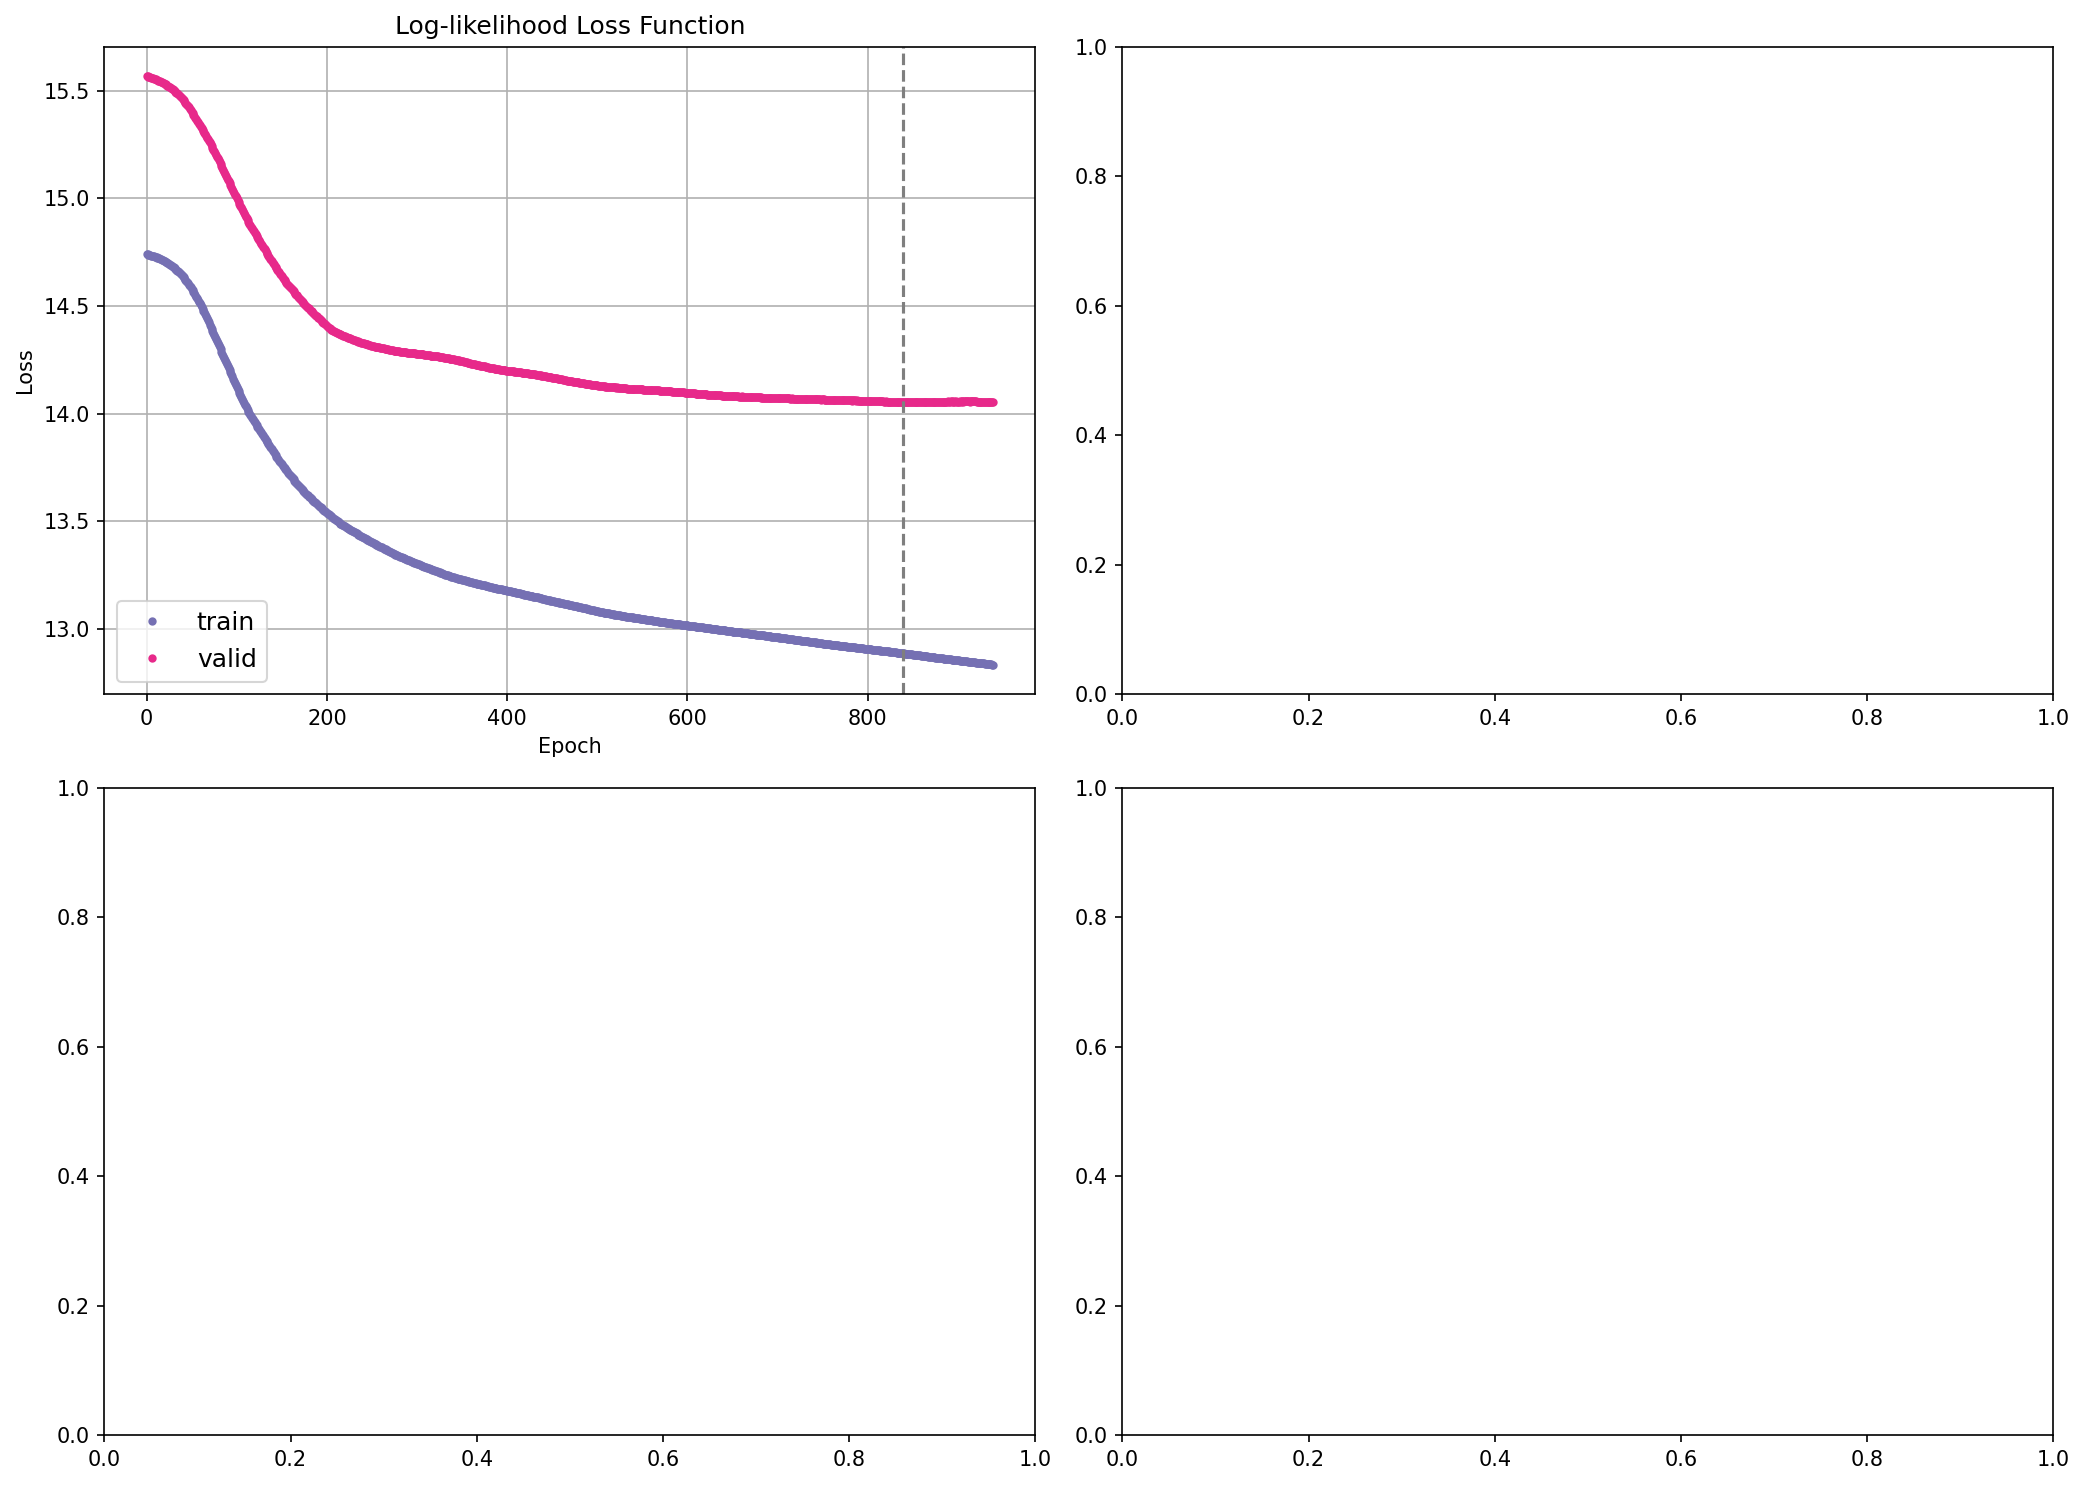

years(2018,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_intensity_and_track_extended.dat',
 'onehot_test_shape': (313, 3),
 'onehot_train_shape': (1081, 3),
 'onehot_val_shape': (256, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (313, 11),
 'x_train_shape': (1081, 11),
 'x_val_shape': (256, 11),
 'y_name': ['OBDV']}


         |   cnt |   min |   25% |   50% |   75% |   max |   avg |   std |   iqr
---------+-------+-------+-------+-------+-------+-------+-------+-------+-------
 y_train |  1081 | -49.2 | -12.0 |  -1.8 |  12.0 | 103.0 |  0.89 | 19.55 |  24.0
 y_val   |   256 | -44.0 | -11.0 |  -0.7 |  11.2 |  56.0 |  1.29 | 18.39 |  22.2
 y_test  |   313 | -40.0 |  -9.5 |   2.3 |  19.2 |  53.8 |  5.25 | 19.26 |  28.7


'intensity1_EPCP72_shash3_network_seed_605_rng_seed_

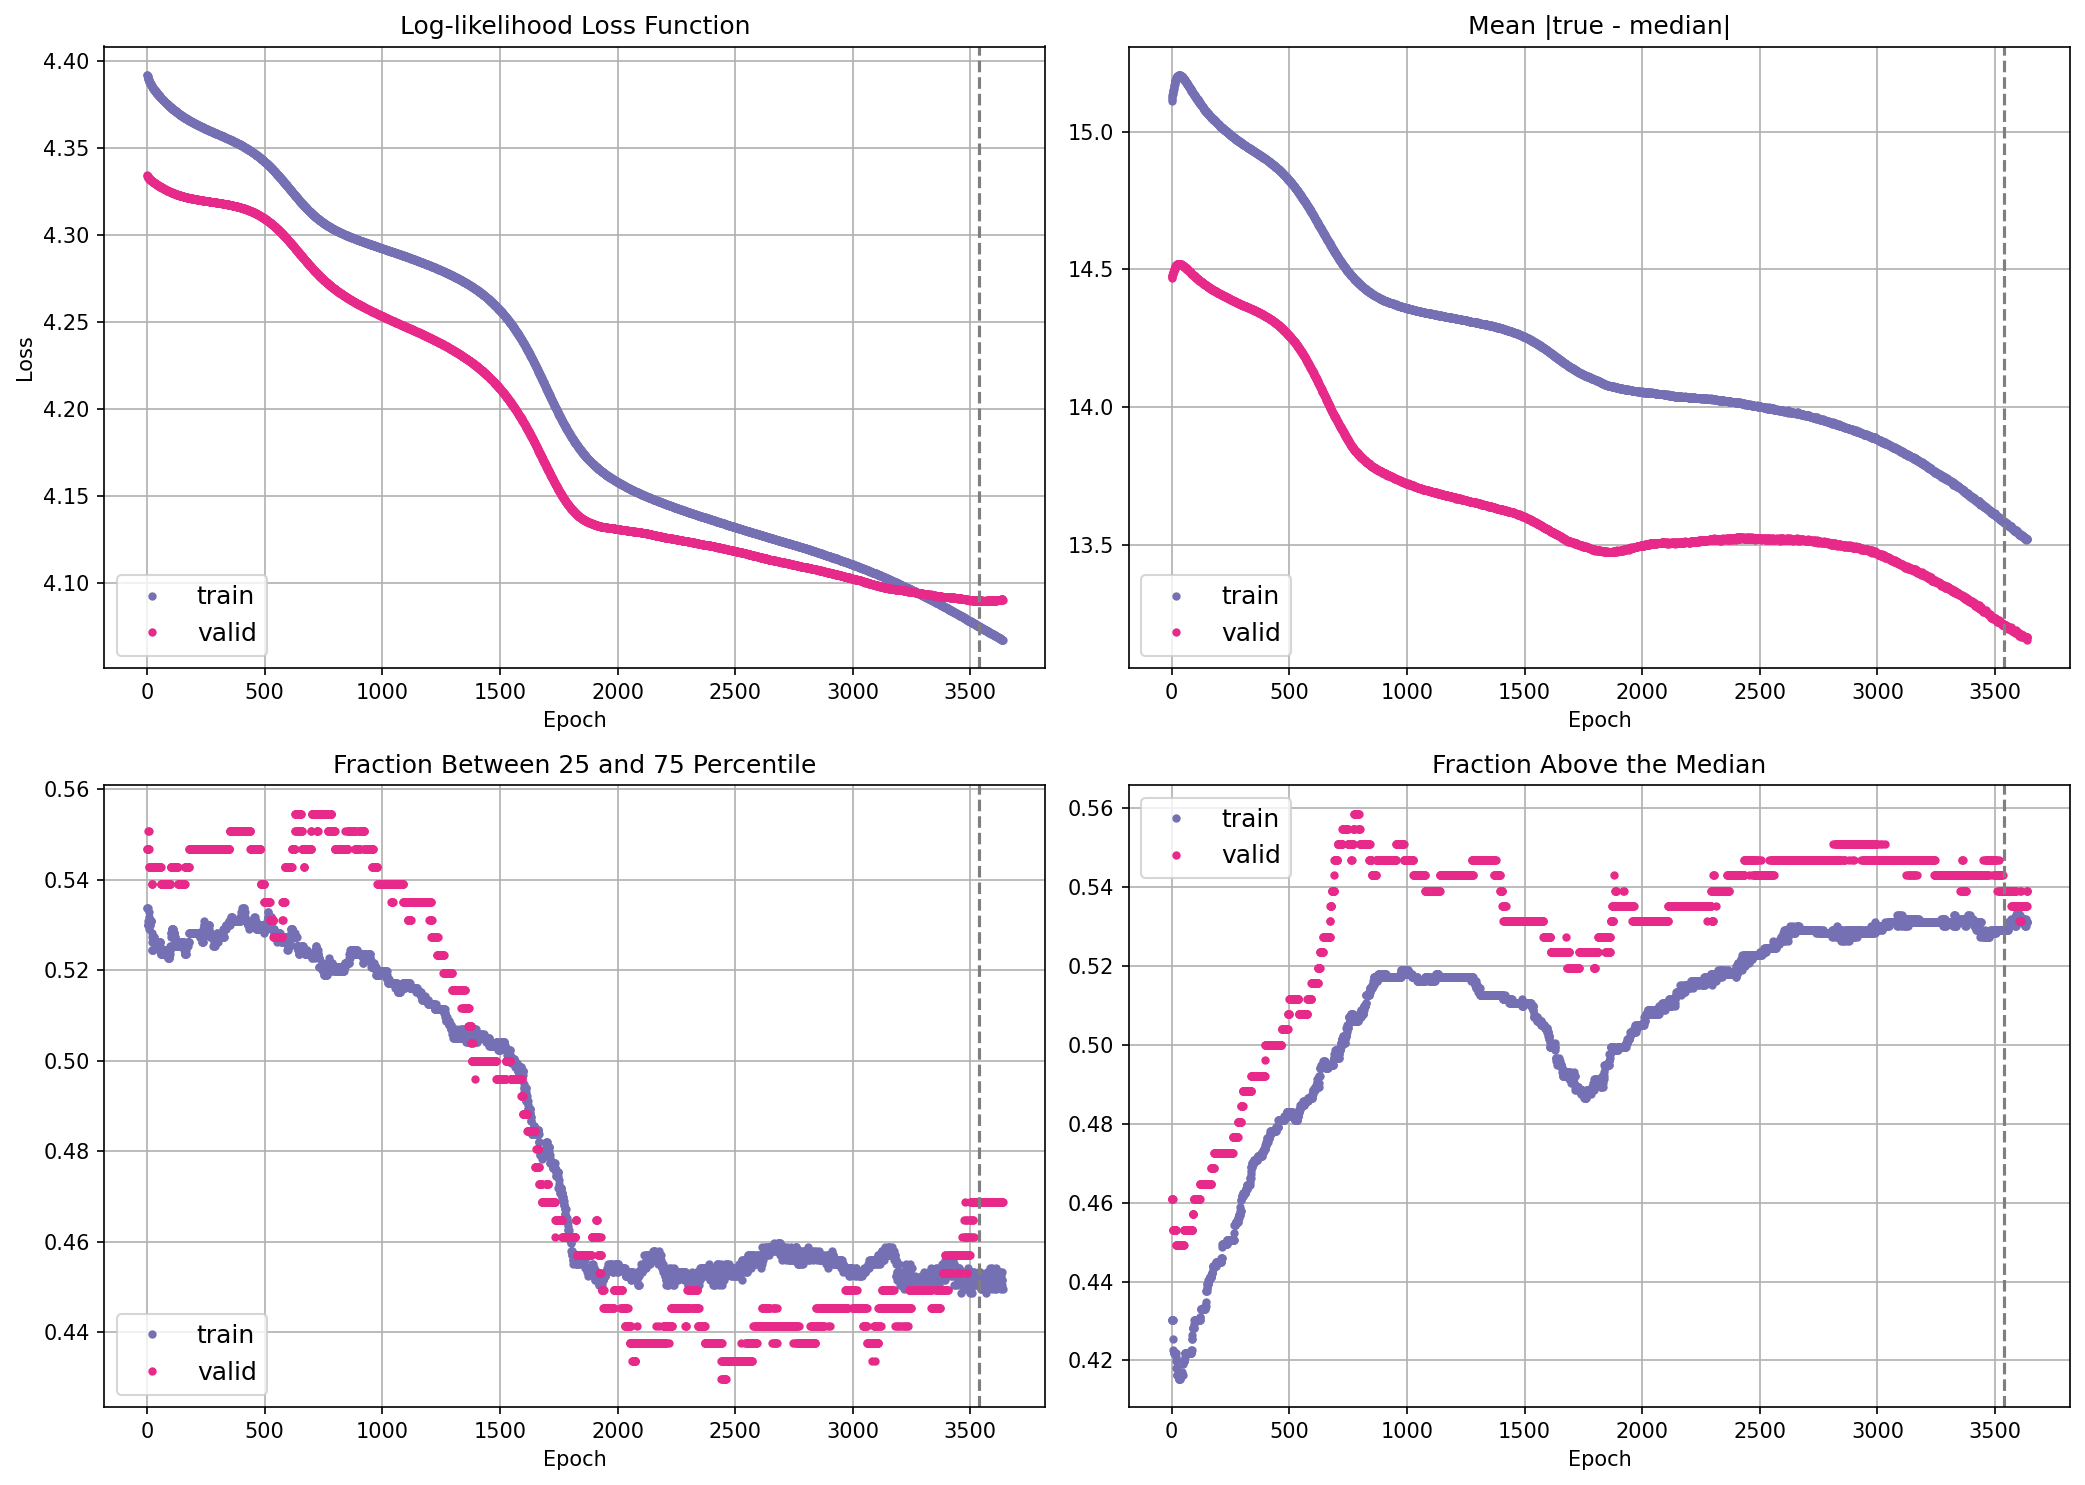

years(2018,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_intensity_and_track_extended.dat',
 'onehot_test_shape': (313, 3),
 'onehot_train_shape': (1081, 3),
 'onehot_val_shape': (256, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (313, 11),
 'x_train_shape': (1081, 11),
 'x_val_shape': (256, 11),
 'y_name': ['OBDV']}


         |   cnt |   min |   25% |   50% |   75% |   max |   avg |   std |   iqr
---------+-------+-------+-------+-------+-------+-------+-------+-------+-------
 y_train |  1081 | -49.2 | -11.8 |  -1.8 |  11.8 | 103.0 |  0.83 | 19.13 |  23.6
 y_val   |   256 | -45.0 | -11.8 |   0.2 |  13.1 |  71.5 |  1.53 | 20.16 |  24.9
 y_test  |   313 | -40.0 |  -9.5 |   2.3 |  19.2 |  53.8 |  5.25 | 19.26 |  28.7


'intensity1_EPCP72_shash3_network_seed_122_rng_seed_

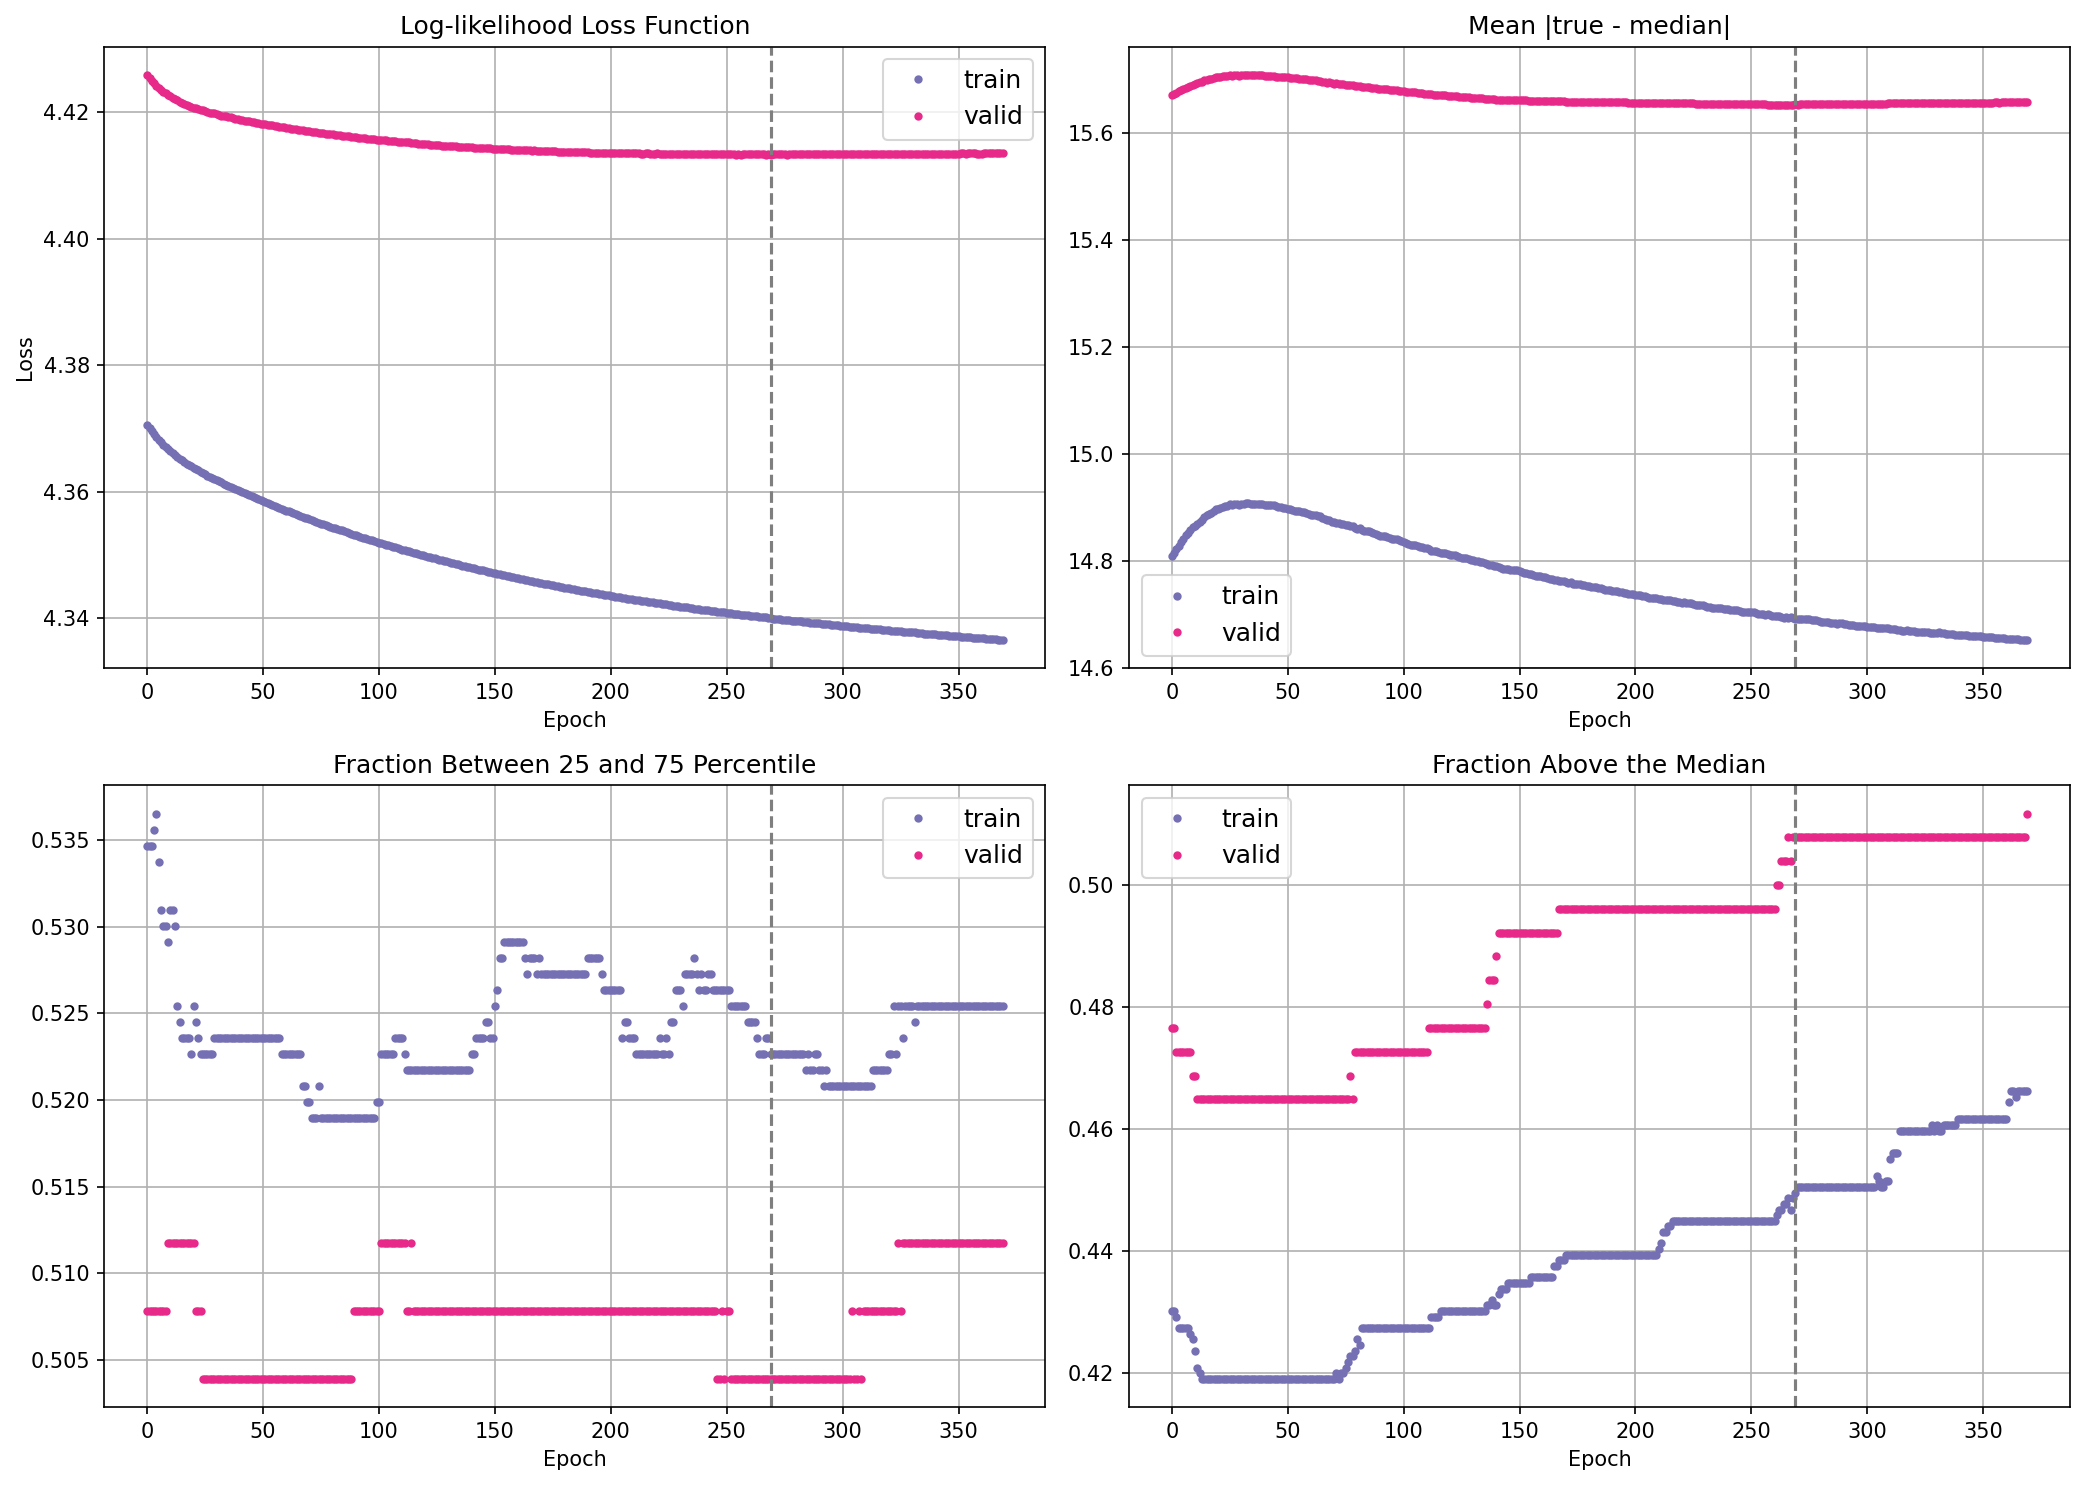

years(2018,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_intensity_and_track_extended.dat',
 'onehot_test_shape': (313, 3),
 'onehot_train_shape': (1081, 3),
 'onehot_val_shape': (256, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (313, 11),
 'x_train_shape': (1081, 11),
 'x_val_shape': (256, 11),
 'y_name': ['OBDV']}


         |   cnt |   min |   25% |   50% |   75% |   max |   avg |   std |   iqr
---------+-------+-------+-------+-------+-------+-------+-------+-------+-------
 y_train |  1081 | -47.0 | -12.0 |  -1.5 |  12.0 | 103.0 |  0.84 | 19.39 |  24.0
 y_val   |   256 | -49.2 | -10.9 |  -1.2 |  12.5 |  71.5 |  1.50 | 19.09 |  23.4
 y_test  |   313 | -40.0 |  -9.5 |   2.3 |  19.2 |  53.8 |  5.25 | 19.26 |  28.7


'intensity1_EPCP72_shash3_network_seed_786_rng_seed_

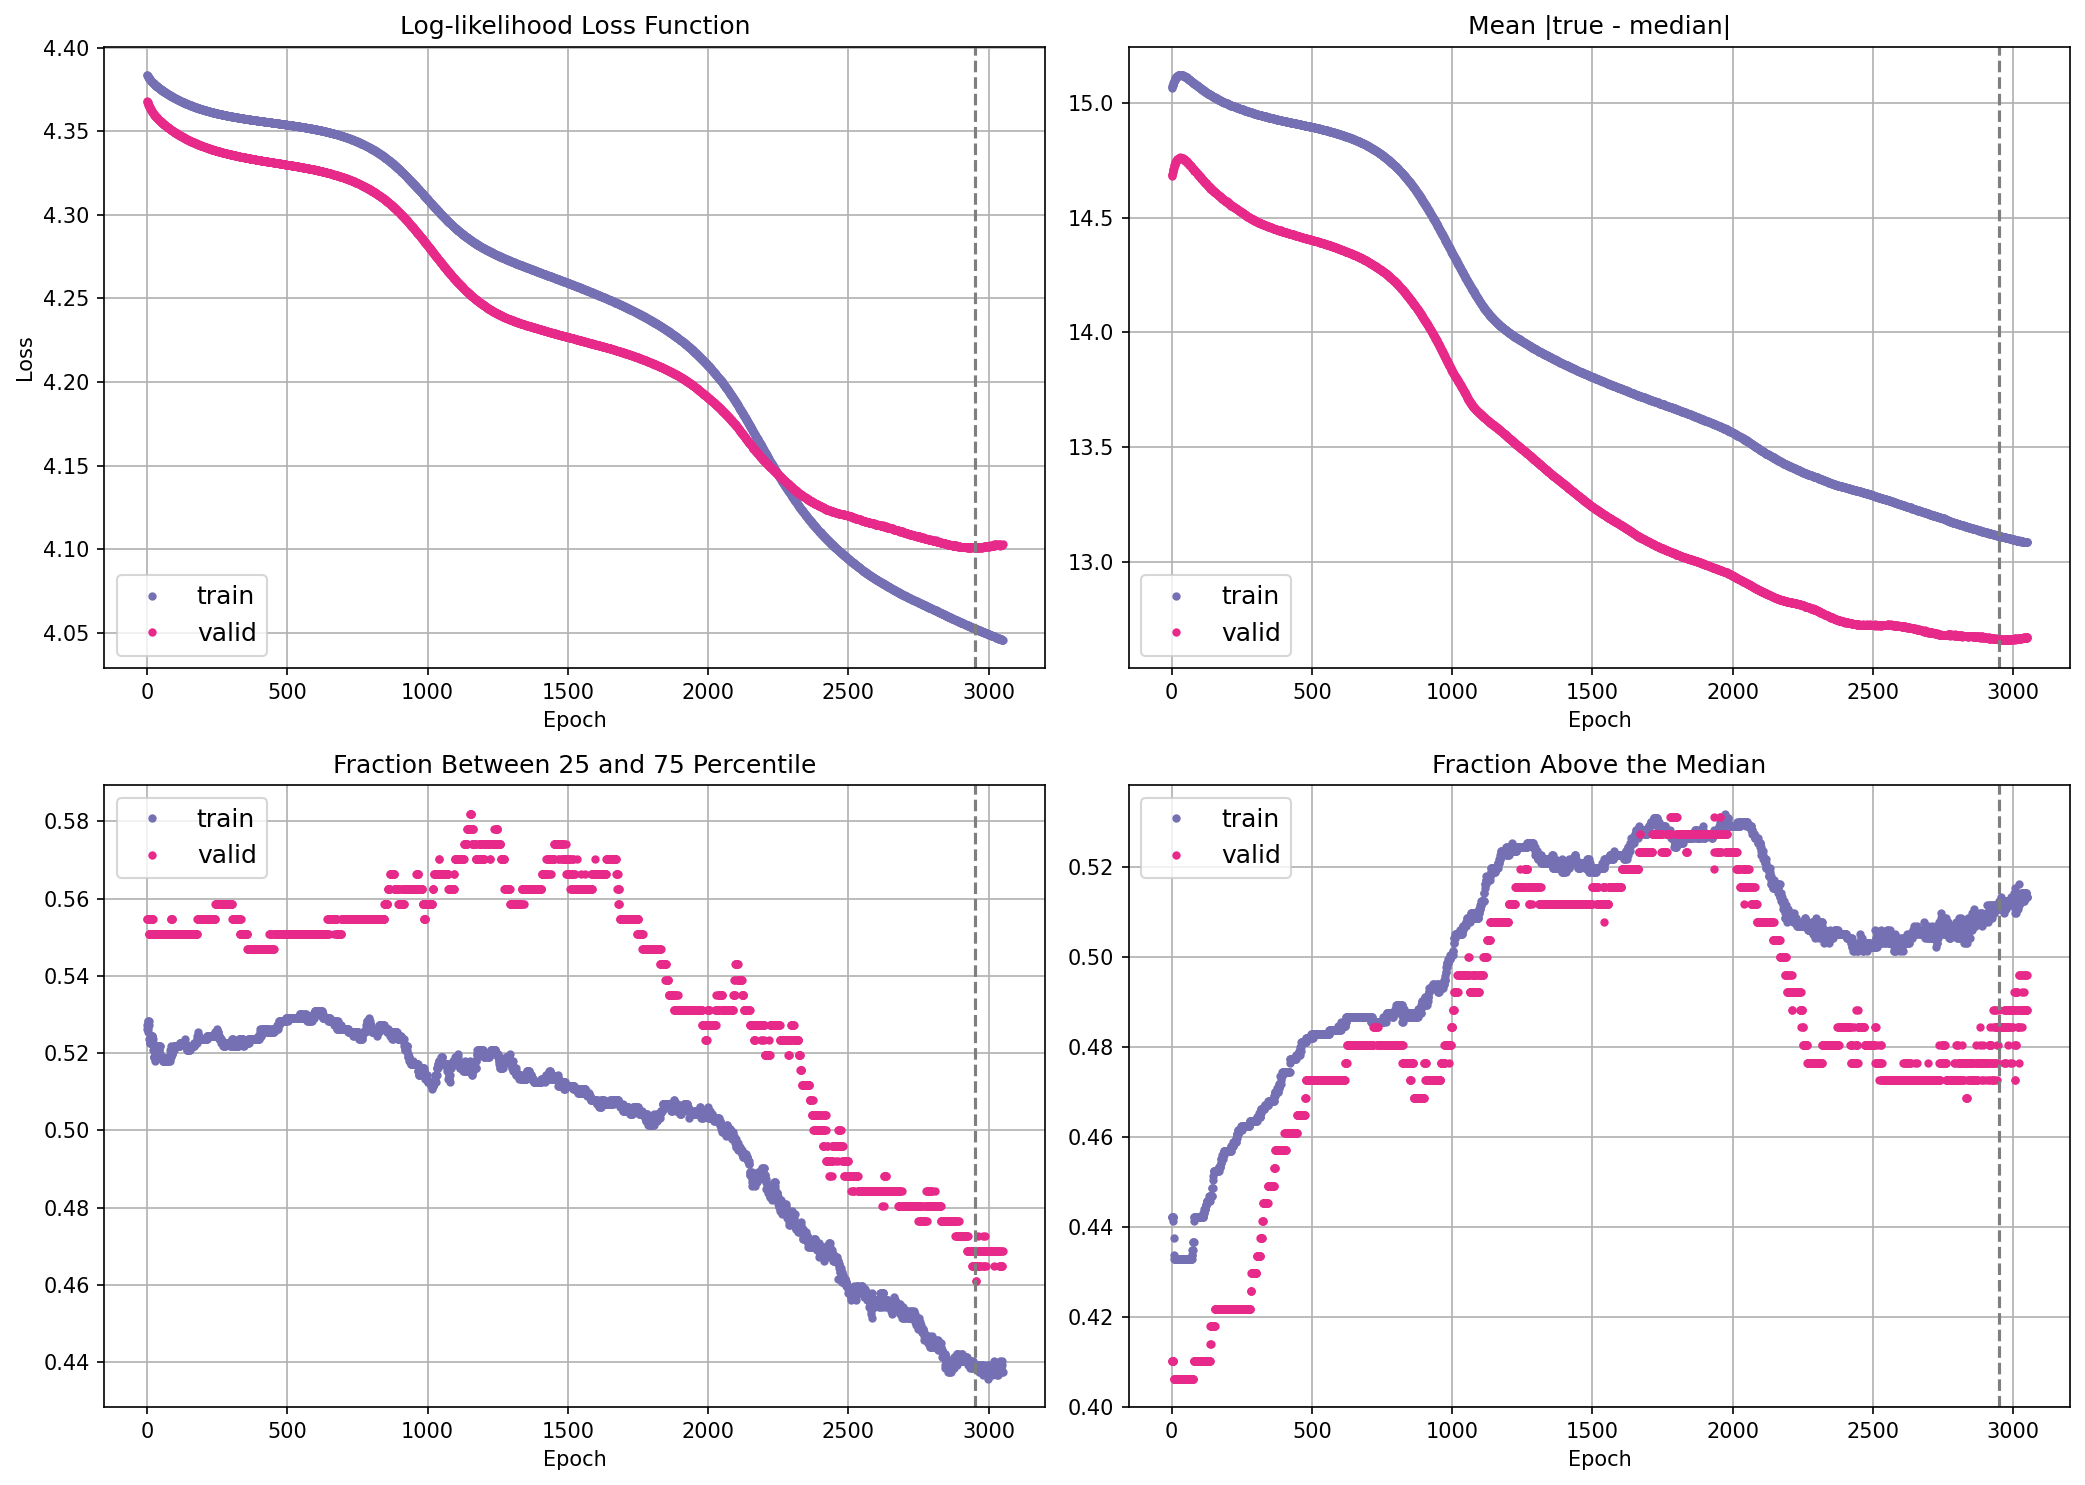

years(2018,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_intensity_and_track_extended.dat',
 'onehot_test_shape': (313, 3),
 'onehot_train_shape': (1081, 3),
 'onehot_val_shape': (256, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (313, 11),
 'x_train_shape': (1081, 11),
 'x_val_shape': (256, 11),
 'y_name': ['OBDV']}


         |   cnt |   min |   25% |   50% |   75% |   max |   avg |   std |   iqr
---------+-------+-------+-------+-------+-------+-------+-------+-------+-------
 y_train |  1081 | -49.2 | -11.8 |  -1.2 |  12.0 | 103.0 |  0.91 | 19.35 |  23.8
 y_val   |   256 | -41.5 | -11.6 |  -2.5 |  12.2 |  73.5 |  1.20 | 19.25 |  23.8
 y_test  |   313 | -40.0 |  -9.5 |   2.3 |  19.2 |  53.8 |  5.25 | 19.26 |  28.7


'intensity1_EPCP72_shash3_network_seed_311_rng_seed_

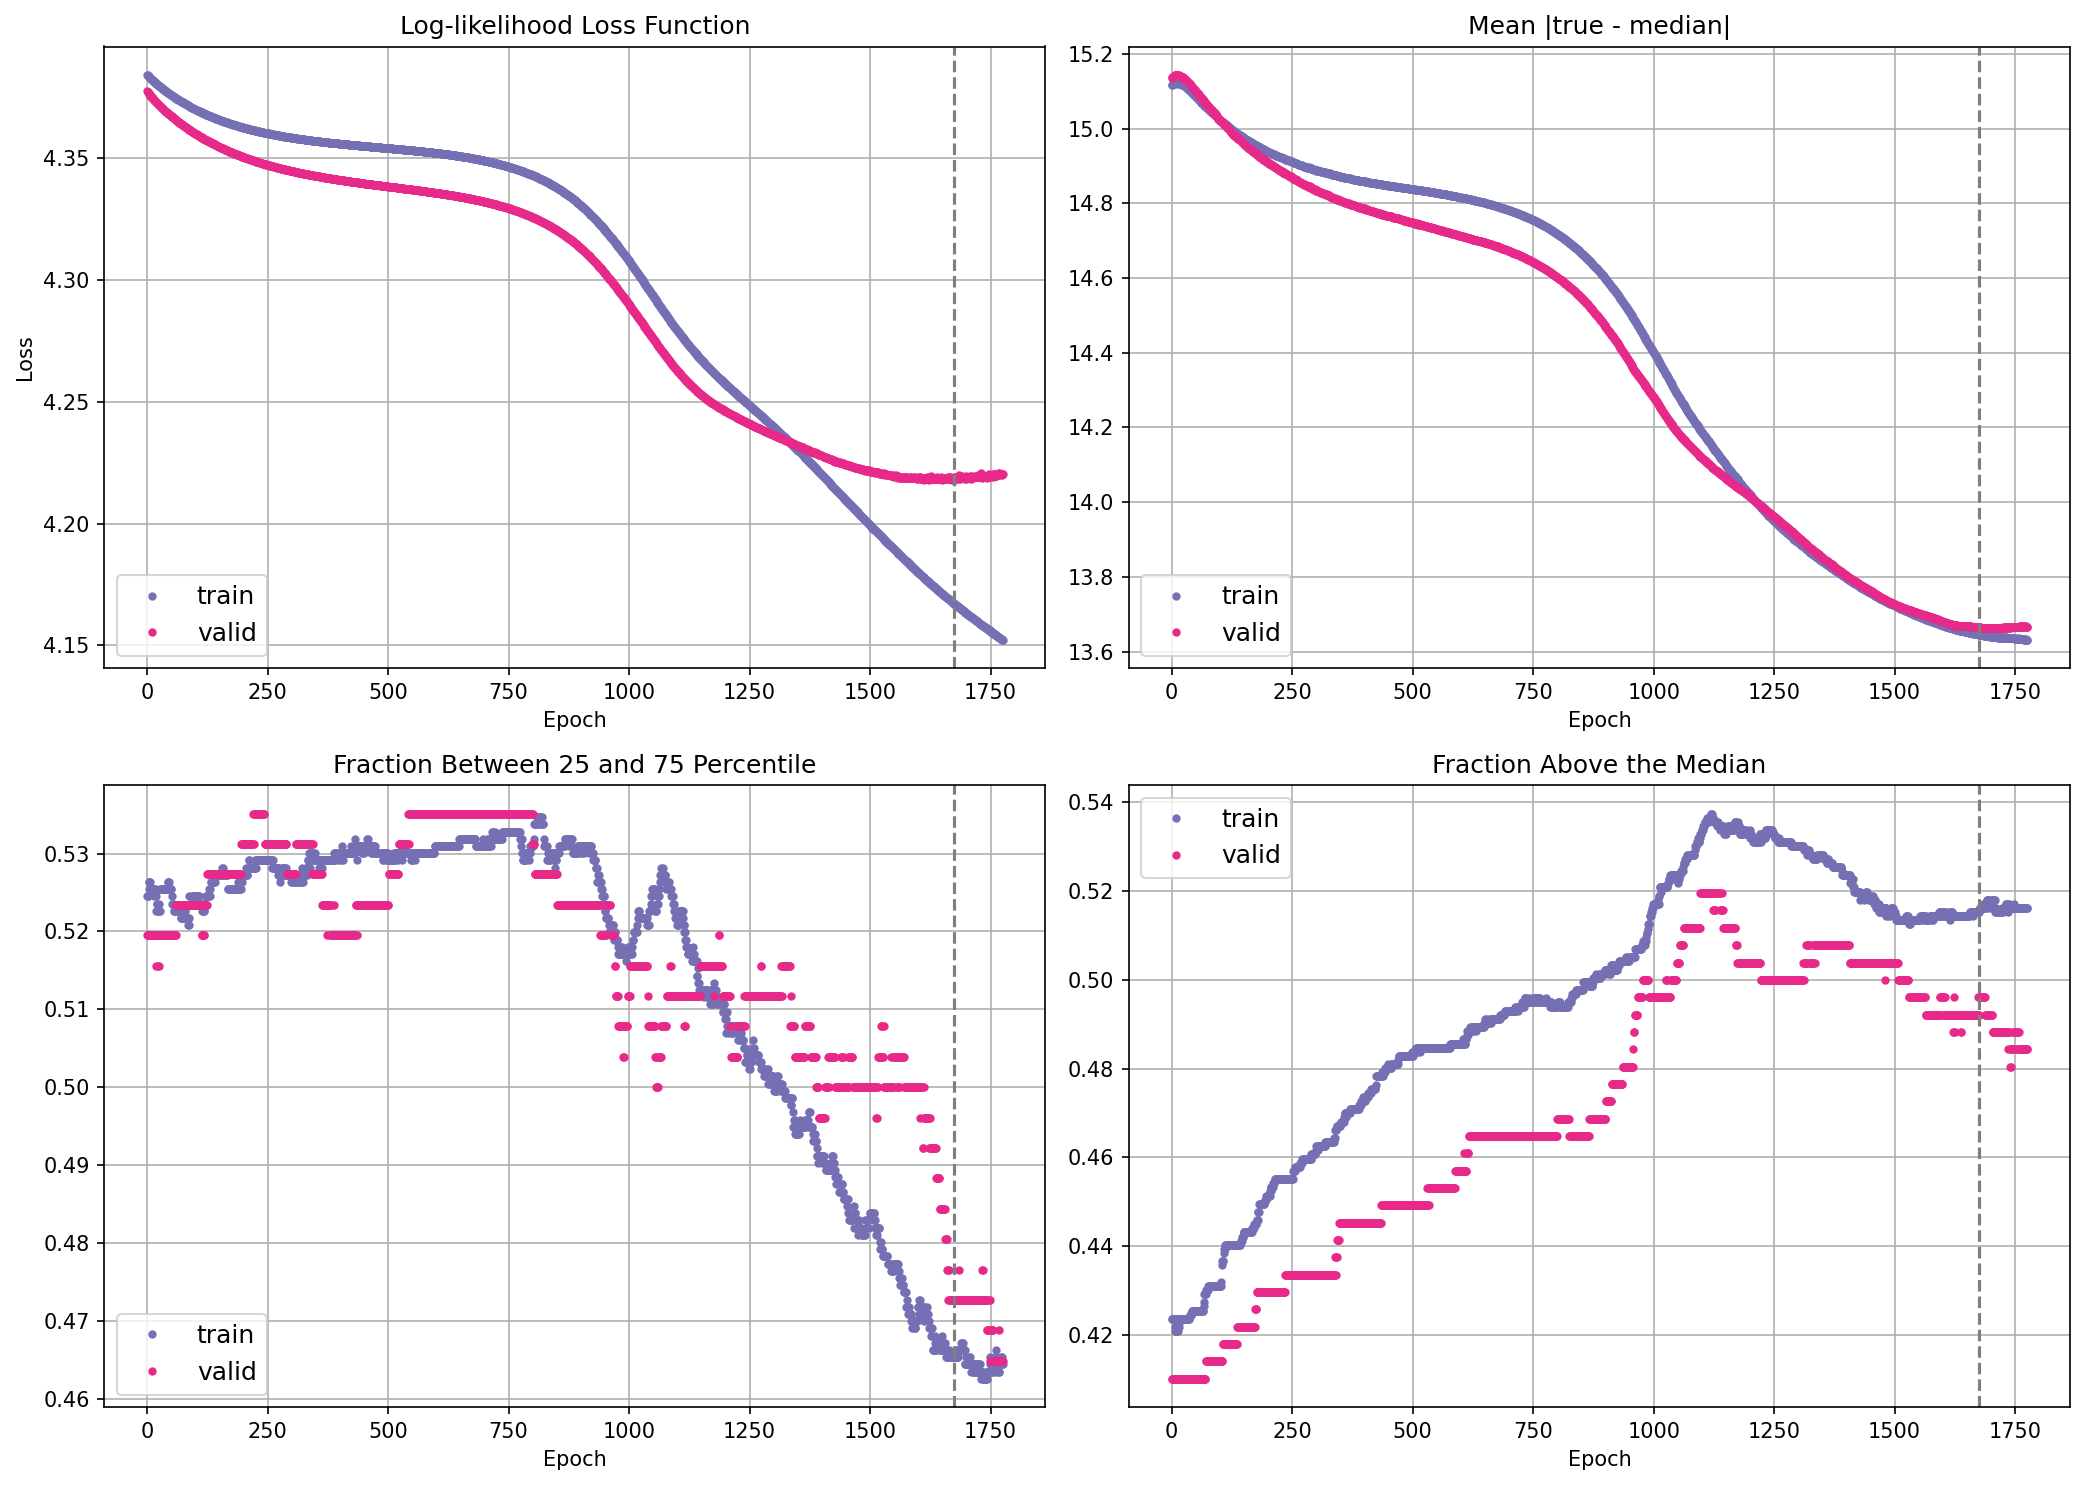

years(2018,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_intensity_and_track_extended.dat',
 'onehot_test_shape': (313, 3),
 'onehot_train_shape': (1081, 3),
 'onehot_val_shape': (256, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (313, 11),
 'x_train_shape': (1081, 11),
 'x_val_shape': (256, 11),
 'y_name': ['OBDV']}


         |   cnt |   min |   25% |   50% |   75% |   max |   avg |   std |   iqr
---------+-------+-------+-------+-------+-------+-------+-------+-------+-------
 y_train |  1081 | -47.0 | -11.8 |  -1.8 |  12.2 | 103.0 |  0.83 | 19.27 |  24.0
 y_val   |   256 | -49.2 | -11.6 |  -0.1 |  11.5 |  74.5 |  1.52 | 19.57 |  23.1
 y_test  |   313 | -40.0 |  -9.5 |   2.3 |  19.2 |  53.8 |  5.25 | 19.26 |  28.7


'intensity1_EPCP72_shash3_network_seed_888_rng_seed_

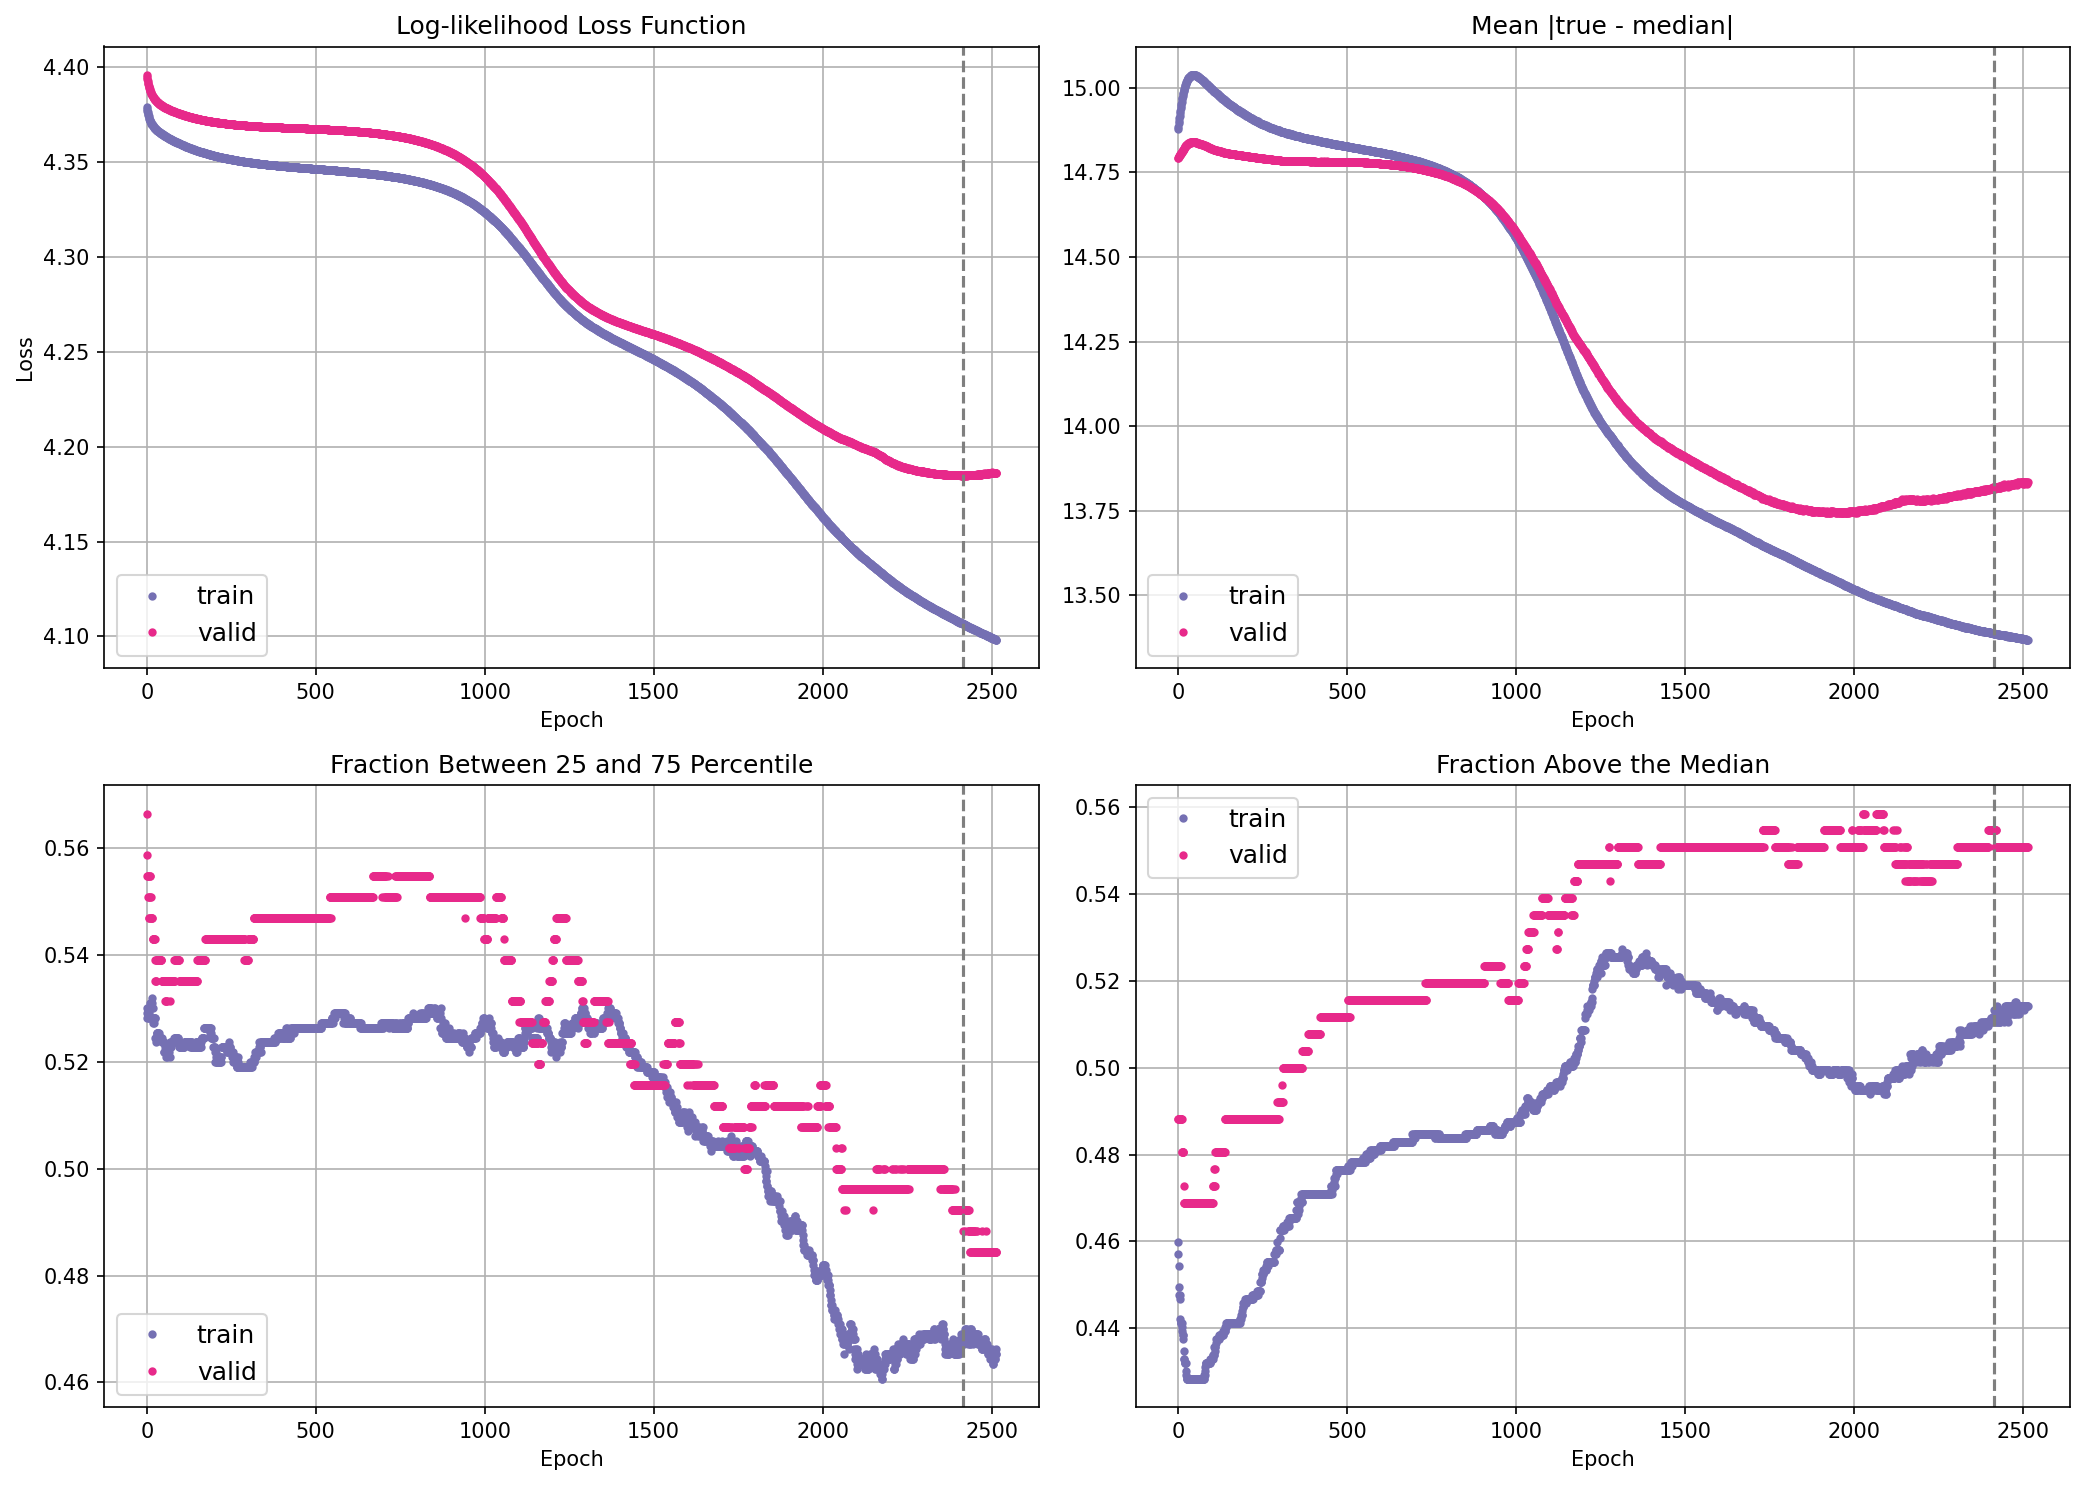

years(2018,) withheld for testing
{'datafile_path': 'data/nnfit_vlist_intensity_and_track_extended.dat',
 'onehot_test_shape': (313, 3),
 'onehot_train_shape': (1081, 3),
 'onehot_val_shape': (256, 3),
 'x_names': ['NCI',
             'DSDV',
             'LGDV',
             'HWDV',
             'AVDV',
             'VMXC',
             'DV12',
             'SLAT',
             'SSTN',
             'SHDC',
             'DTL'],
 'x_test_shape': (313, 11),
 'x_train_shape': (1081, 11),
 'x_val_shape': (256, 11),
 'y_name': ['OBDV']}


         |   cnt |   min |   25% |   50% |   75% |   max |   avg |   std |   iqr
---------+-------+-------+-------+-------+-------+-------+-------+-------+-------
 y_train |  1081 | -49.2 | -12.0 |  -1.8 |  11.8 |  74.8 |  0.74 | 18.87 |  23.8
 y_val   |   256 | -44.0 | -11.2 |  -0.5 |  13.9 | 103.0 |  1.91 | 21.14 |  25.1
 y_test  |   313 | -40.0 |  -9.5 |   2.3 |  19.2 |  53.8 |  5.25 | 19.26 |  28.7


'intensity1_EPCP72_shash3_network_seed_999_rng_seed_

KeyboardInterrupt: 

In [4]:
for EXP_NAME in EXP_NAME_LIST:
    settings = experiment_settings.get_settings(EXP_NAME)
    # pprint.pprint(settings, width=80)

    RNG_SEED_LIST = np.copy(settings['rng_seed'])
    # NETWORK_SEED_LIST = [1701, 5552, 8529, 4440, 2657,] # currently over-written later in this script

    for rng_seed in RNG_SEED_LIST:
        settings['rng_seed'] = rng_seed
        # pprint.pprint(settings['rng_seed'], width=80)

        # build the intensity data tensors
        (
            data_summary,
            x_train,
            onehot_train,
            x_val,
            onehot_val,
            x_test,
            onehot_test,    
            df_train,
            df_val,
            df_test,
        ) = build_hurricane_data(DATA_PATH, settings, verbose=2)

        # define the callbacks
        earlystoping_callback = tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            mode="min",
            patience=settings["patience"],
            restore_best_weights=True,
            verbose=1,
        )

        training_callback = TrainingInstrumentation(
            x_train,
            onehot_train,
            interval=50,
        )

        callbacks = [earlystoping_callback, 
                     # training_callback,
                    ]

        # set network seed and train the model
        NETWORK_SEED_LIST = [settings["rng_seed"]]

        for network_seed in NETWORK_SEED_LIST:
            tf.random.set_seed(network_seed)  # This sets the global random seed.

            # Create the model name.
            model_name = (
                EXP_NAME + "_" + settings["uncertainty_type"] + '_' + f"network_seed_{network_seed}_rng_seed_{settings['rng_seed']}"
            )
            pprint.pprint(model_name)

            # Make, compile, and train the model
            tf.keras.backend.clear_session()            
            model = build_model.make_model(
                settings,
                x_train,
                onehot_train,
                model_compile=True,
            )   
            model.summary()

            # check if the model exists
            model_savename = MODEL_PATH + model_name + "_weights.h5"
            if os.path.exists(model_savename) and OVERWRITE_MODEL==False:
                print(model_savename + 'exists. Skipping...')
                continue

            # train the network
            start_time = time.time()
            history = model.fit(
                x_train,
                onehot_train,
                validation_data=(x_val, onehot_val),
                batch_size=settings["batch_size"],
                epochs=settings["n_epochs"],
                shuffle=True,
                verbose=0,
                callbacks=callbacks,
            )
            stop_time = time.time()

            # Display the results, and save the model rum.
            best_epoch = np.argmin(history.history["val_loss"])
            fit_summary = {
                "network_seed": network_seed,
                "elapsed_time": stop_time - start_time,
                "best_epoch": best_epoch,
                "loss_train": history.history["loss"][best_epoch],
                "loss_valid": history.history["val_loss"][best_epoch],
            }
            pprint.pprint(fit_summary, width=80)
            plot_history(history, model_name)

            save_model_run(
                data_summary,
                fit_summary,
                model,
                MODEL_PATH,
                model_name,
                settings,
                __version__,
            )